In [1]:
import pandas as pd
from os.path import join, dirname, basename
import os
import numpy as np
from icecream import ic

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=2.5)

In [2]:
top_n = 6

In [3]:
indir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var_init/variants.prefilterMerge_impute_knnRes.30/aggregate/annotation/"
outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var_init/variants.prefilterMerge_impute_knnRes.30/aggregate/annotation/clone_lineage/"


In [4]:
cells_meta = pd.read_csv(join(indir, "se_cells_meta_labels.tsv"), sep="\t", index_col=0)
cells_meta

cells_meta = cells_meta[~(cells_meta["run"].isnull())]
cells_meta["run"].unique()



array(['cd34norm', 'CHIP_a1', 'CHIP_b1', 'CHIP_b2'], dtype=object)

In [5]:
cells_meta.sample(50)

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_ATAC_log2,nCount_RNA,nFeature_RNA,Row.names,name,run,donor,condition,cluster_labels
CHIP_a1_Flt3l_AGCCTCTTCTTCGTTA-1,Flt3l,7906,7906,210391.0,58258,985,1261,6135,131098,12654,...,6,12.948915,10561,6431,CHIP_a1_Flt3l_AGCCTCTTCTTCGTTA-1,CHIP_a1_1_25,CHIP_a1,CHIP_a1_1,Flt3l,MkP 1
CHIP_b1_Input_GGACACCTCCATCTAT-1,Input,4086,4086,30858.0,5286,96,111,936,16522,7907,...,1,11.996827,4483,3322,CHIP_b1_Input_GGACACCTCCATCTAT-1,CHIP_b1_1_7,CHIP_b1,CHIP_b1_1,Input,HPSC 1
cd34norm_Flt3l_TCCATCGTCTCTGACC-1,Flt3l,987,987,8440.0,1094,31,42,341,4250,2682,...,12,9.948367,1420,1284,cd34norm_Flt3l_TCCATCGTCTCTGACC-1,cd34norm_3_3,cd34norm,cd34norm_3,Flt3l,HPSC 5
CHIP_b2_Input_TAGCCGGGTGCGCTCA-1,Input,2042,2042,11118.0,1958,41,41,328,5293,3457,...,1,10.996473,2084,1783,CHIP_b2_Input_TAGCCGGGTGCGCTCA-1,CHIP_b2_0_3,CHIP_b2,CHIP_b2_0,Input,HPSC 1
CHIP_b2_Input_TGATCAGAGCCCATTA-1,Input,953,953,7540.0,694,25,26,166,5067,1562,...,10,9.897845,967,886,CHIP_b2_Input_TGATCAGAGCCCATTA-1,CHIP_b2_1_21,CHIP_b2,CHIP_b2_1,Input,HPSC 4
CHIP_b2_Input_GGGACCTAGACACGGT-1,Input,1795,1795,12570.0,1776,36,37,271,7466,2984,...,5,10.810572,1913,1576,CHIP_b2_Input_GGGACCTAGACACGGT-1,CHIP_b2_1_1,CHIP_b2,CHIP_b2_1,Input,Neutrophil 2
cd34norm_Flt3l_AGCGTGCAGTATACGA-1,Flt3l,1010,1010,7509.0,1190,63,52,422,3107,2675,...,0,9.981567,1421,1273,cd34norm_Flt3l_AGCGTGCAGTATACGA-1,cd34norm_3_3,cd34norm,cd34norm_3,Flt3l,Monocyte 1
cd34norm_Flt3l_CAAAGCTCAACTAGAA-1,Flt3l,2963,2963,14532.0,2950,72,68,728,4018,6696,...,6,11.533330,3935,3059,cd34norm_Flt3l_CAAAGCTCAACTAGAA-1,cd34norm_1_1,cd34norm,cd34norm_1,Flt3l,MkP 1
CHIP_b1_Input_CTCTAGCCATCTGCAA-1,Input,3351,3351,26159.0,4587,70,111,740,13987,6664,...,5,11.710806,3673,2793,CHIP_b1_Input_CTCTAGCCATCTGCAA-1,CHIP_b1_1_3,CHIP_b1,CHIP_b1_1,Input,Neutrophil 2
cd34norm_Flt3l_CGCACAGTCGTTTGAG-1,Flt3l,5238,5238,27833.0,7086,159,152,1704,6315,12417,...,9,12.355076,6882,4766,cd34norm_Flt3l_CGCACAGTCGTTTGAG-1,cd34norm_2_0,cd34norm,cd34norm_2,Flt3l,Non-classical monocyte


In [6]:
if "cluster_labels" in cells_meta.columns:
    cells_meta["nuclear_clusters"] = cells_meta["cluster_labels"]
else:
    cells_meta["nuclear_clusters"] = cells_meta["seurat_clusters"]

## Plot lineage distribution

In [7]:
cells_meta.columns

Index(['orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'total', 'duplicate',
       'chimeric', 'unmapped', 'lowmapq', 'mitochondrial', 'passed_filters',
       'cell_id', 'is__cell_barcode', 'TSS_fragments',
       'DNase_sensitive_region_fragments', 'enhancer_region_fragments',
       'promoter_region_fragments', 'on_target_fragments',
       'blacklist_region_fragments', 'peak_region_fragments',
       'peak_region_cutsites', 'proj', 'expID', 'nucleosome_signal',
       'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile',
       'pct_reads_in_peaks', 'blacklist_ratio', 'high.tss', 'nucleosome_group',
       'ATAC_snn_res.0.8', 'seurat_clusters', 'nCount_ATAC_log2', 'nCount_RNA',
       'nFeature_RNA', 'Row.names', 'name', 'run', 'donor', 'condition',
       'cluster_labels', 'nuclear_clusters'],
      dtype='object')

In [8]:
donor_run_meta = cells_meta.loc[~cells_meta[["run", "donor"]].duplicated(), ["run", "donor"]].set_index("donor")
donor_run_meta

,run
donor,
cd34norm_1,cd34norm
cd34norm_0,cd34norm
cd34norm_2,cd34norm
cd34norm_3,cd34norm
CHIP_a1_0,CHIP_a1
CHIP_a1_1,CHIP_a1
CHIP_a1_4,CHIP_a1
CHIP_a1_2,CHIP_a1
CHIP_a1_3,CHIP_a1


In [9]:
clones_df = cells_meta.groupby(["cluster_labels", "donor", "name", "run"]).size().reset_index().rename({0:"ncells"}, axis=1)
clones_df

clones_df["ncells"] = np.log2(1+clones_df["ncells"]).fillna(0)



clust_order = clones_df.groupby("cluster_labels").sum().sort_values("ncells")[::-1].index
clust_order

Index(['HPSC 1', 'HPSC 2', 'Neutrophil 2', 'Neutrophil 1', 'Granulocyte',
       'MkP 1', 'Monocyte 1', 'HPSC 3', 'HPSC 4', 'MkP 2', 'Erythrocyte',
       'Unknown 1', 'Pre-B cell', 'Non-classical monocyte', 'preDC', 'HPSC 5',
       'Monocyte 2', 'Unknown 2'],
      dtype='object', name='cluster_labels')

In [10]:
(clones_df["ncells"]<0).any()

False

In [11]:
don_ncells = clones_df.groupby(["donor"]).sum()["ncells"]
don_ncells

clones_df["donor_normed_ncells"] = clones_df.apply(lambda x: x["ncells"]/don_ncells.loc[x["donor"]], axis=1)
clones_df = clones_df.sort_values(["ncells", "donor_normed_ncells"])[::-1]
clones_df

,cluster_labels,donor,name,run,ncells,donor_normed_ncells
494,HPSC 1,CHIP_b1_1,CHIP_b1_1_0,CHIP_b1,6.954196,0.009434
458,HPSC 1,CHIP_b1_0,CHIP_b1_0_0,CHIP_b1,6.832890,0.006234
990,HPSC 3,CHIP_b1_0,CHIP_b1_0_0,CHIP_b1,6.794416,0.006199
575,HPSC 1,CHIP_b2_1,CHIP_b2_1_26,CHIP_b2,6.442943,0.009584
515,HPSC 1,CHIP_b1_1,CHIP_b1_1_5,CHIP_b1,6.357552,0.008625
...,...,...,...,...,...,...
180,Granulocyte,CHIP_b1_0,CHIP_b1_0_18,CHIP_b1,1.000000,0.000912
177,Granulocyte,CHIP_b1_0,CHIP_b1_0_15,CHIP_b1,1.000000,0.000912
176,Granulocyte,CHIP_b1_0,CHIP_b1_0_14,CHIP_b1,1.000000,0.000912
175,Granulocyte,CHIP_b1_0,CHIP_b1_0_13,CHIP_b1,1.000000,0.000912


In [12]:
clones_df.groupby(["donor", "cluster_labels"]).sum()[["ncells"]]

ncells
donor      cluster_labels                   
CHIP_a1_0  Erythrocyte              1.000000
           Granulocyte             38.367703
           HPSC 1                   5.584963
           HPSC 2                  40.006074
           HPSC 3                   5.000000
...                                      ...
cd34norm_3 Neutrophil 2            83.244816
           Non-classical monocyte  43.511403
           Pre-B cell              12.000000
           Unknown 1               41.808983
           preDC                   12.169925

[204 rows x 1 columns]

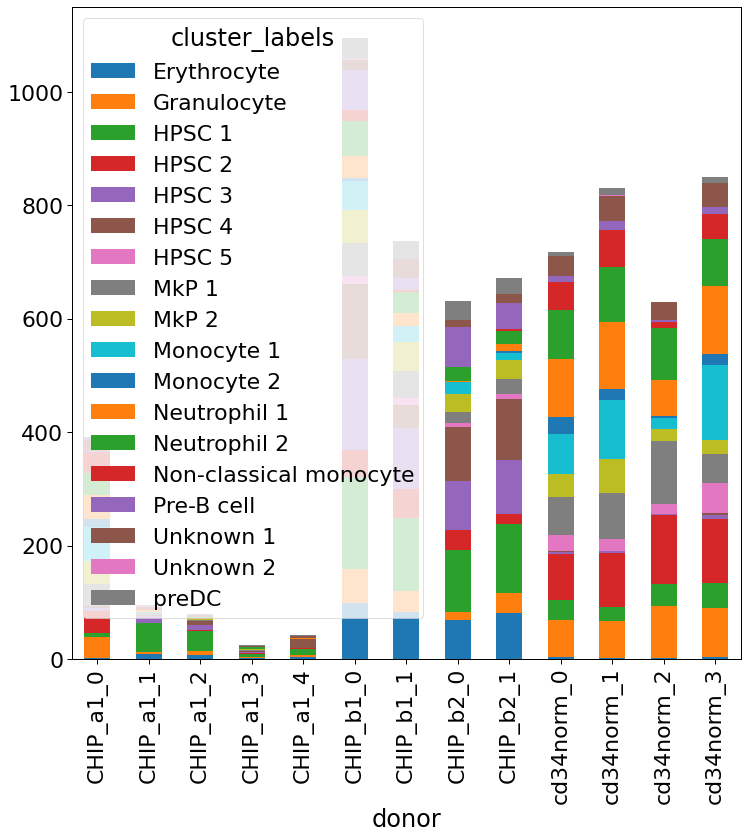

In [13]:
f, ax = plt.subplots(figsize=(12,12))
don_clust_counts = clones_df.groupby(["donor", "cluster_labels"]).sum()[["ncells"]].reset_index()
don_clust_counts.pivot(index="donor", values="ncells",
                       columns="cluster_labels").fillna(0).plot.bar(stacked=True, ax=ax)
plt.savefig(join(outdir, "donor_lineage_clusters.svg"))
plt.savefig(join(outdir, "donor_lineage_clusters.pdf"))

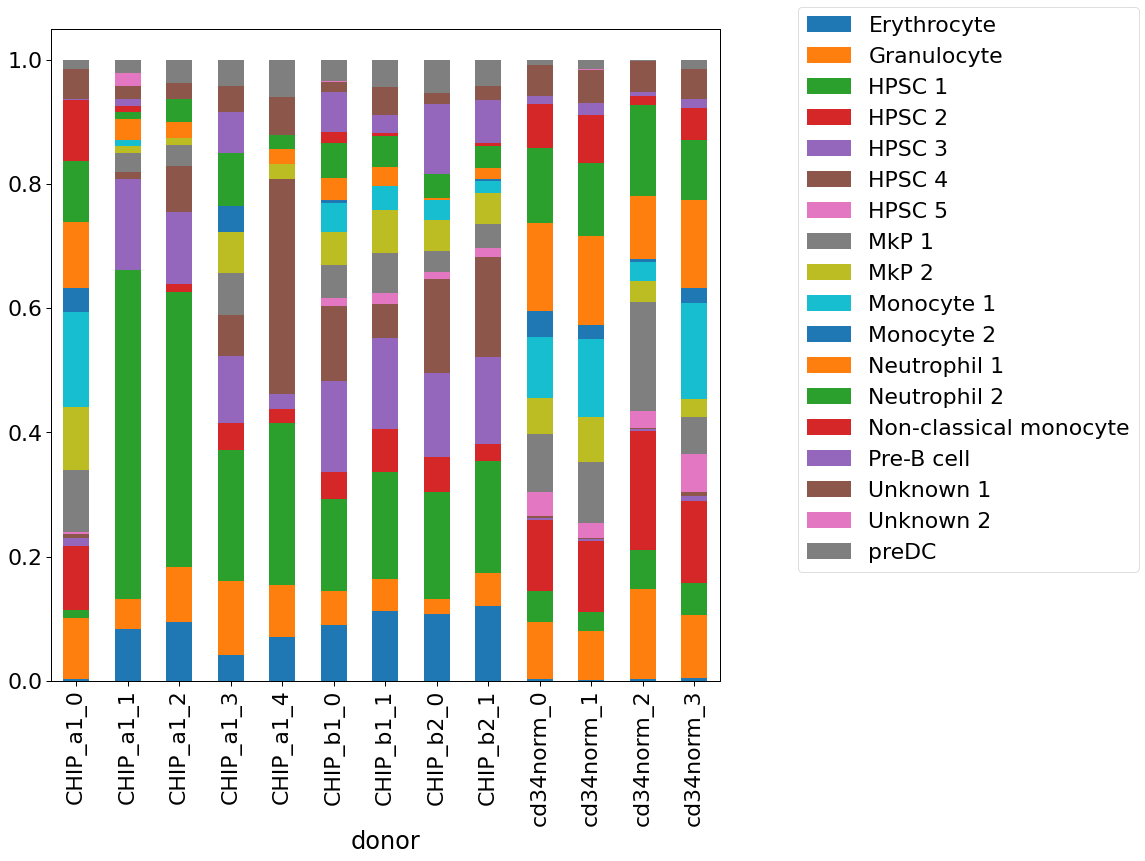

In [14]:
f, ax = plt.subplots(figsize=(12,12))
don_clust_counts = clones_df.groupby(["donor", "cluster_labels"]).sum()[["donor_normed_ncells"]].reset_index()
don_clust_counts.pivot(index="donor", values="donor_normed_ncells",
                       columns="cluster_labels").fillna(0).plot.bar(stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.savefig(join(outdir, "donor_lineage_clusters_normed.svg"))
plt.savefig(join(outdir, "donor_lineage_clusters_normed.pdf"))

In [15]:
clones_df.groupby("donor").sum()[["donor_normed_ncells"]]

,donor_normed_ncells
donor,
CHIP_a1_0,1.0
CHIP_a1_1,1.0
CHIP_a1_2,1.0
CHIP_a1_3,1.0
CHIP_a1_4,1.0
CHIP_b1_0,1.0
CHIP_b1_1,1.0
CHIP_b2_0,1.0
CHIP_b2_1,1.0


In [16]:
def plots(df, y_col, outdir):
    
    g = sns.catplot(x="cluster_labels", y=y_col, data=clones_df, hue="run", height=8, col_wrap=4,
                col="donor", kind="boxen", facet_kws={'legend_out': True})
    for ax_n in g.axes_dict:
        ax = g.axes_dict[ax_n]
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.savefig(join(outdir, "clone_cluster_boxen.svg"))
    plt.savefig(join(outdir, "clone_cluster_boxen.pdf"))
    

    g = sns.catplot(x="cluster_labels", y=y_col, data=clones_df, hue="run", col_wrap=4,
                col="donor", kind="violin", inner = "stick", height=8, facet_kws={'legend_out': True})
    for ax_n in g.axes_dict:
        ax = g.axes_dict[ax_n]
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.savefig(join(outdir, "clone_cluster_violin.svg"))
    plt.savefig(join(outdir, "clone_cluster_violin.pdf"))
    
    g = sns.catplot(x="cluster_labels", y=y_col, data=clones_df, hue="run", height=8,col_wrap=4,
                col="donor", kind="violin", inner = "stick", sharey=False, facet_kws={'legend_out': True})
    for ax_n in g.axes_dict:
        ax = g.axes_dict[ax_n]
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.savefig(join(outdir, "clone_cluster_violin_noShareY.svg"))
    plt.savefig(join(outdir, "clone_cluster_violin.noShareY.pdf"))
    
    g = sns.catplot(x="cluster_labels", y=y_col, data=clones_df, hue="run", height=8,col_wrap=4,
                col="donor", kind="boxen", sharey=False, facet_kws={'legend_out': True})
    for ax_n in g.axes_dict:
        ax = g.axes_dict[ax_n]
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


    plt.savefig(join(outdir, "clone_cluster_boxen_noShareY.svg"))
    plt.savefig(join(outdir, "clone_cluster_boxen.noShareY.pdf"))
    #top_clones_plots(df, y_col, outdir)

    return


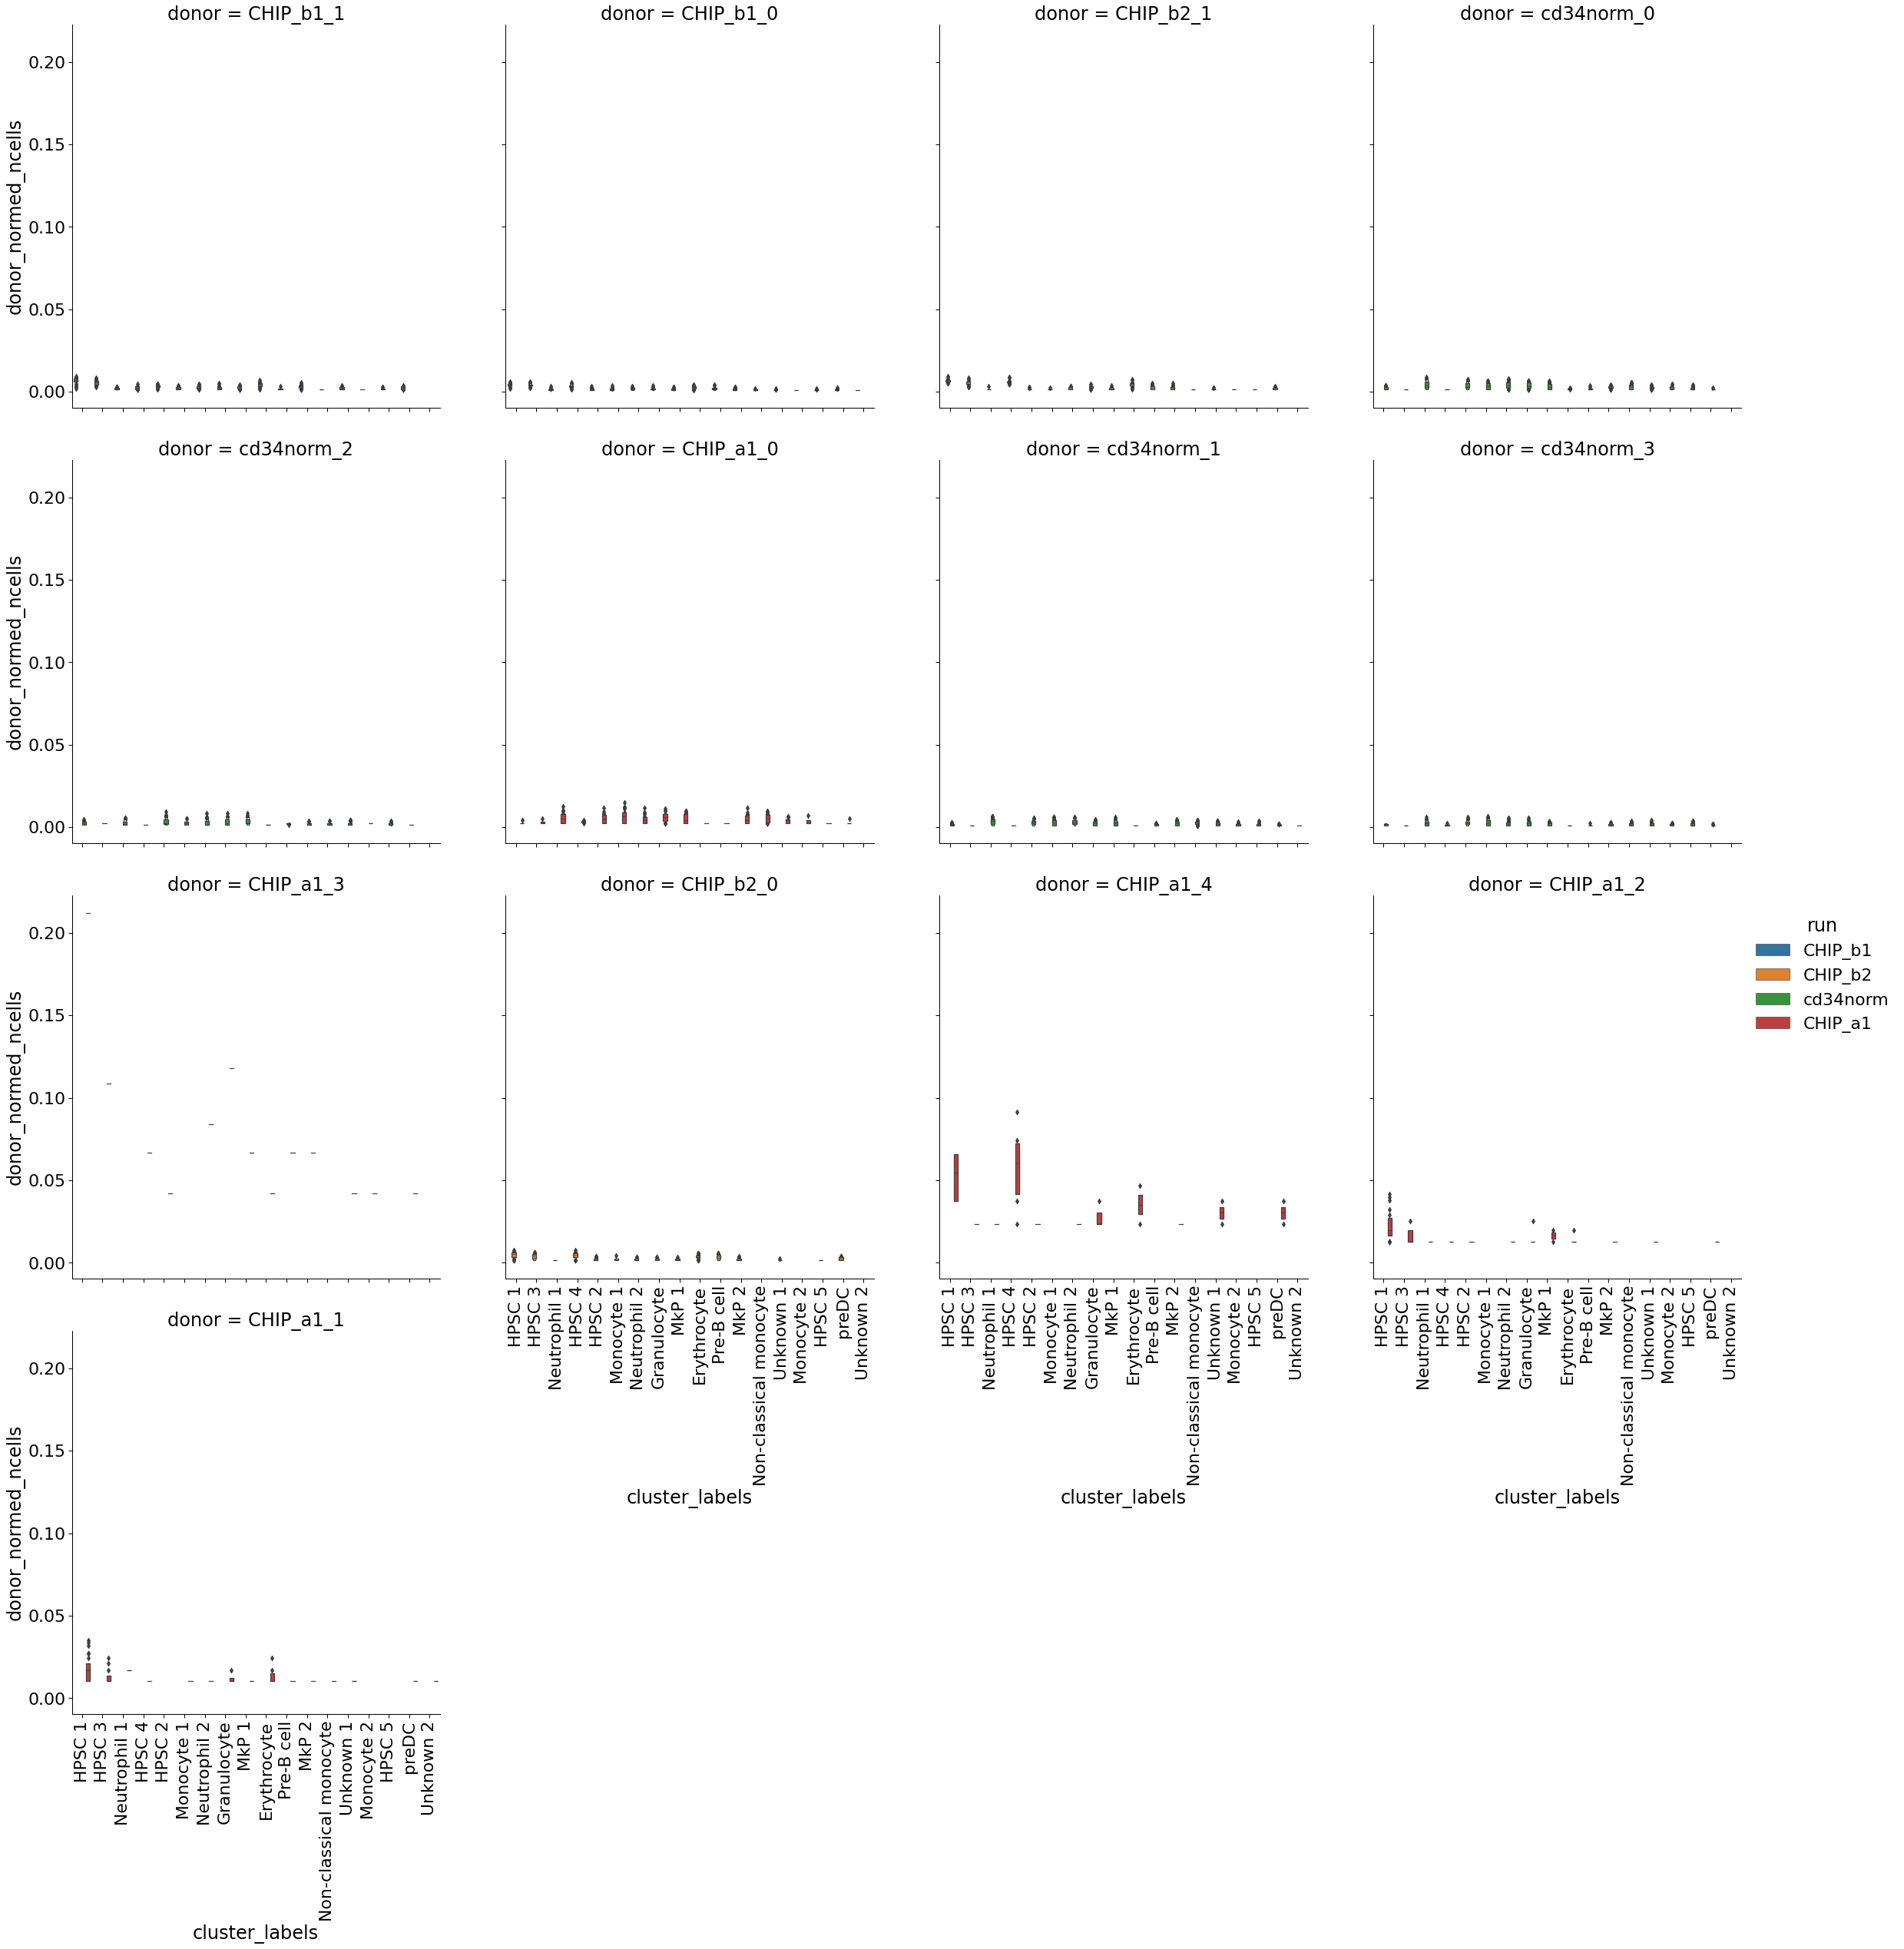

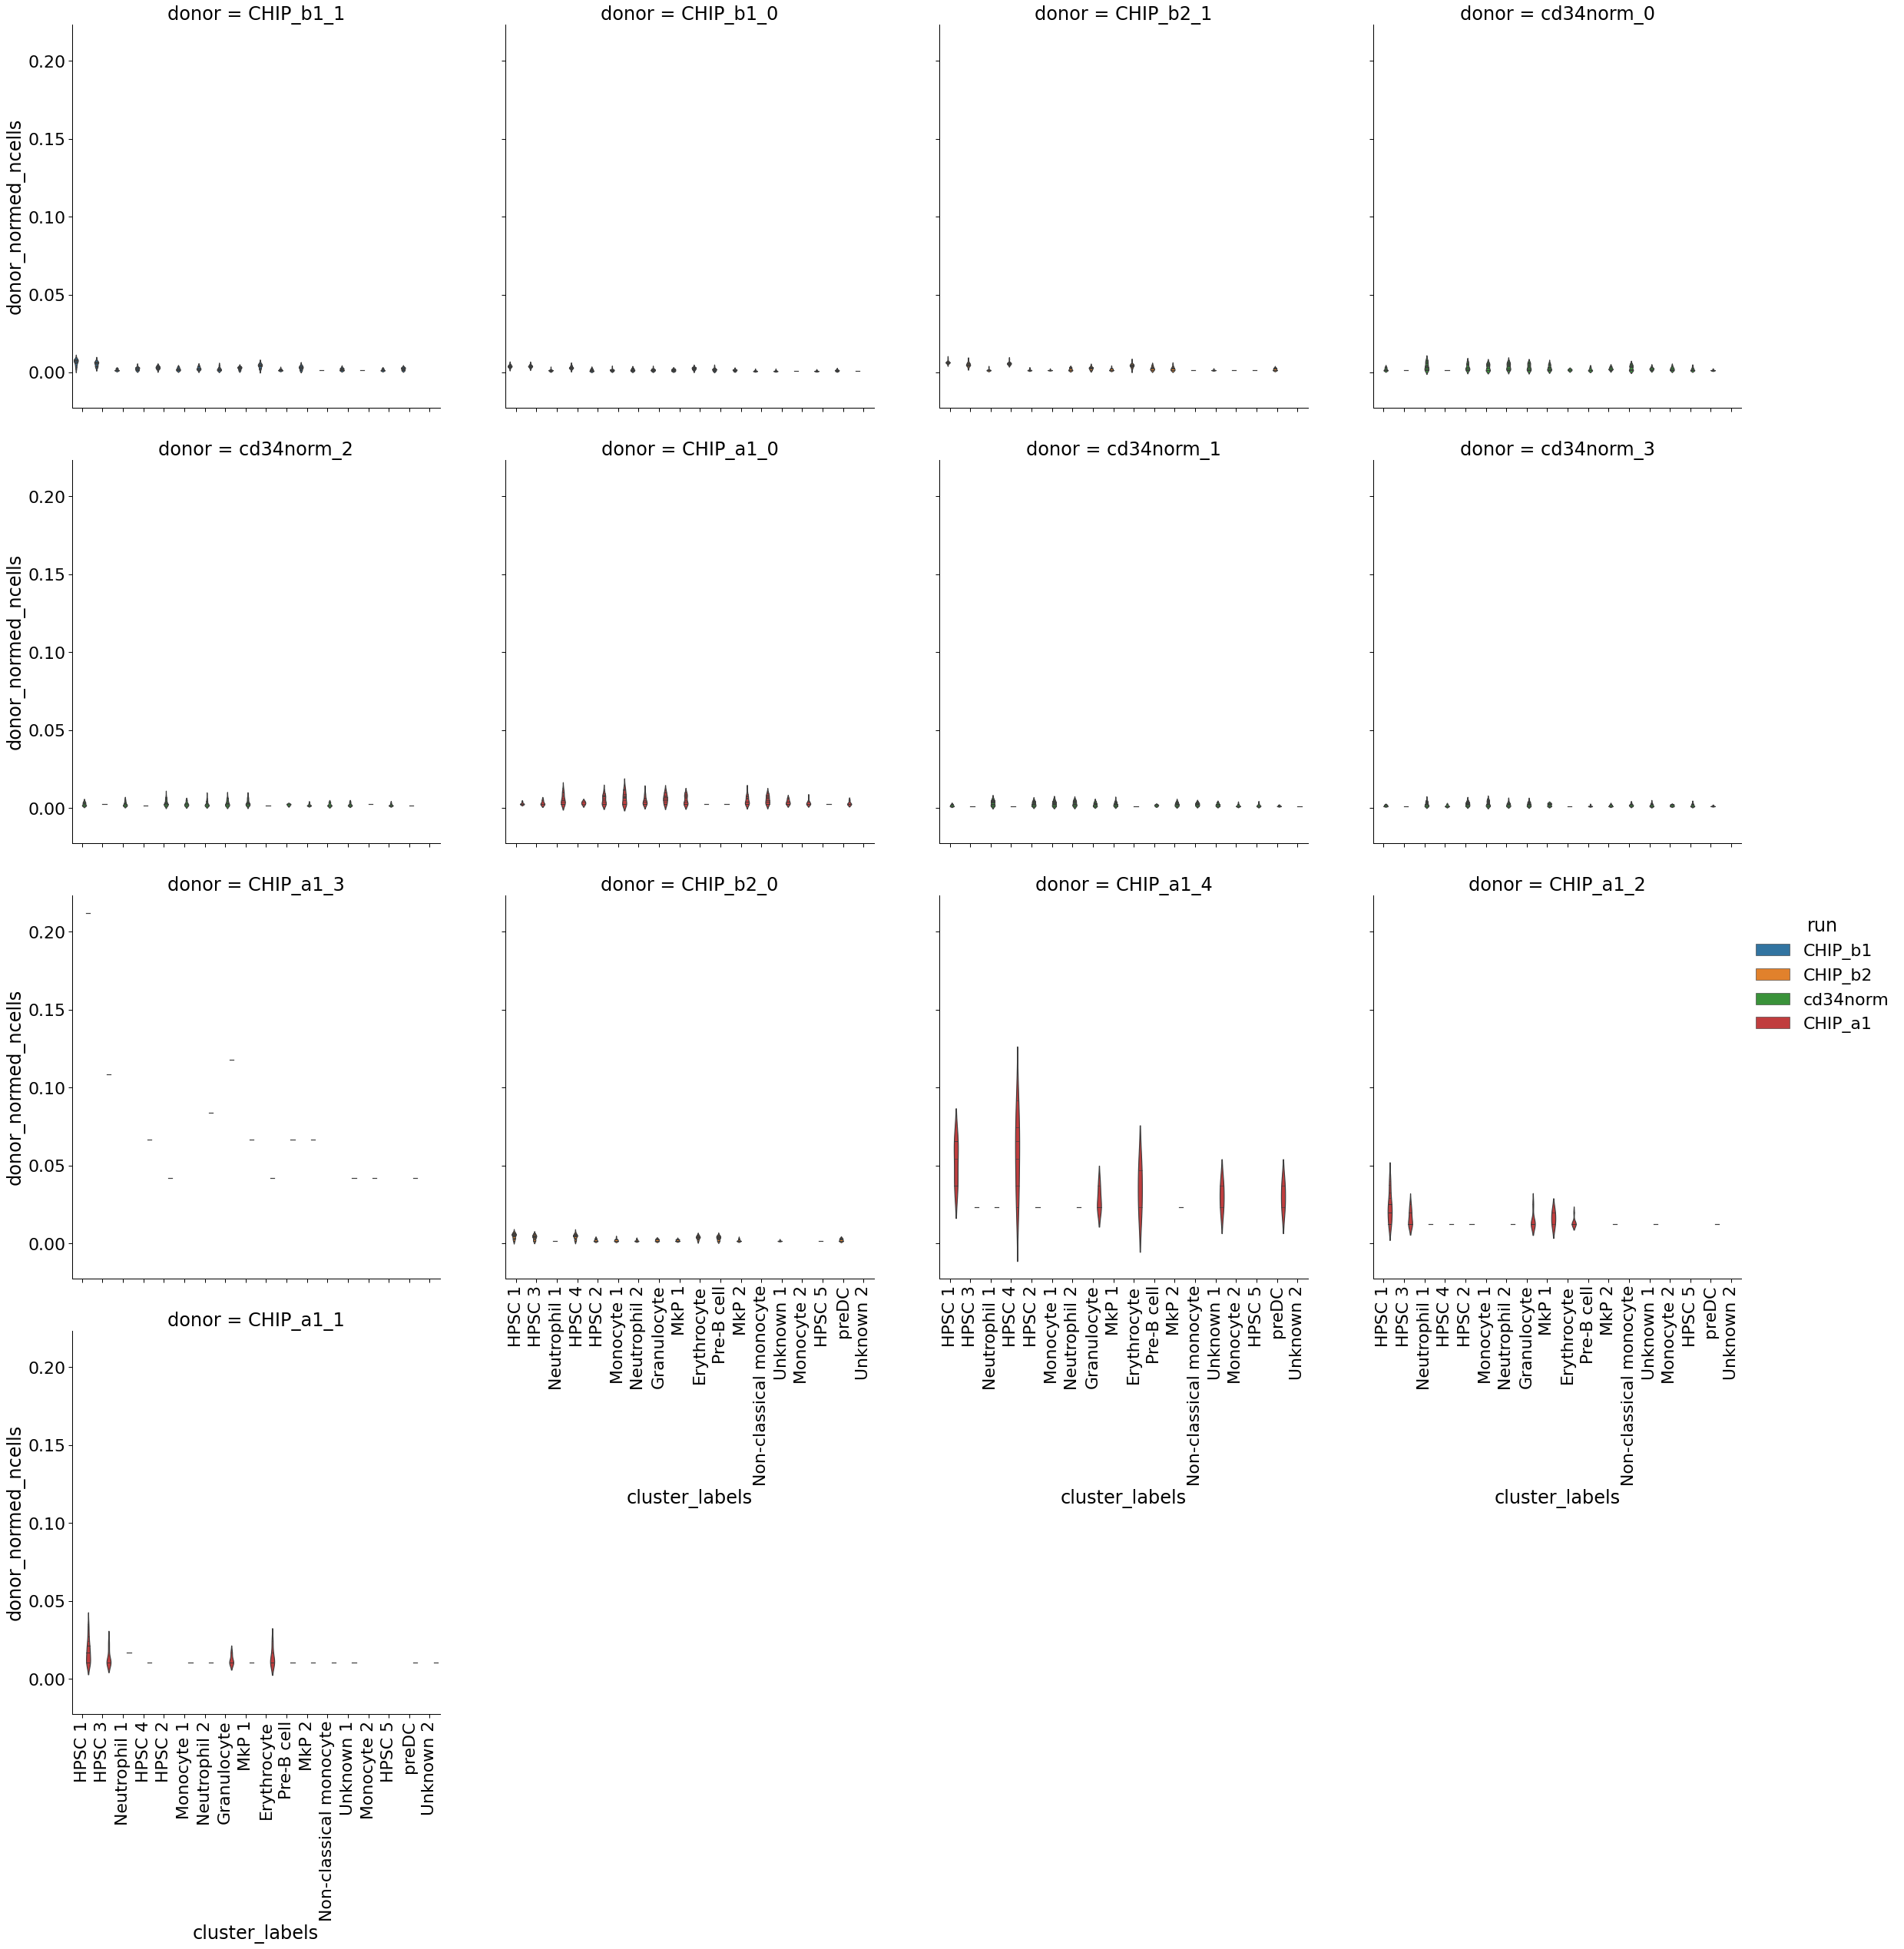

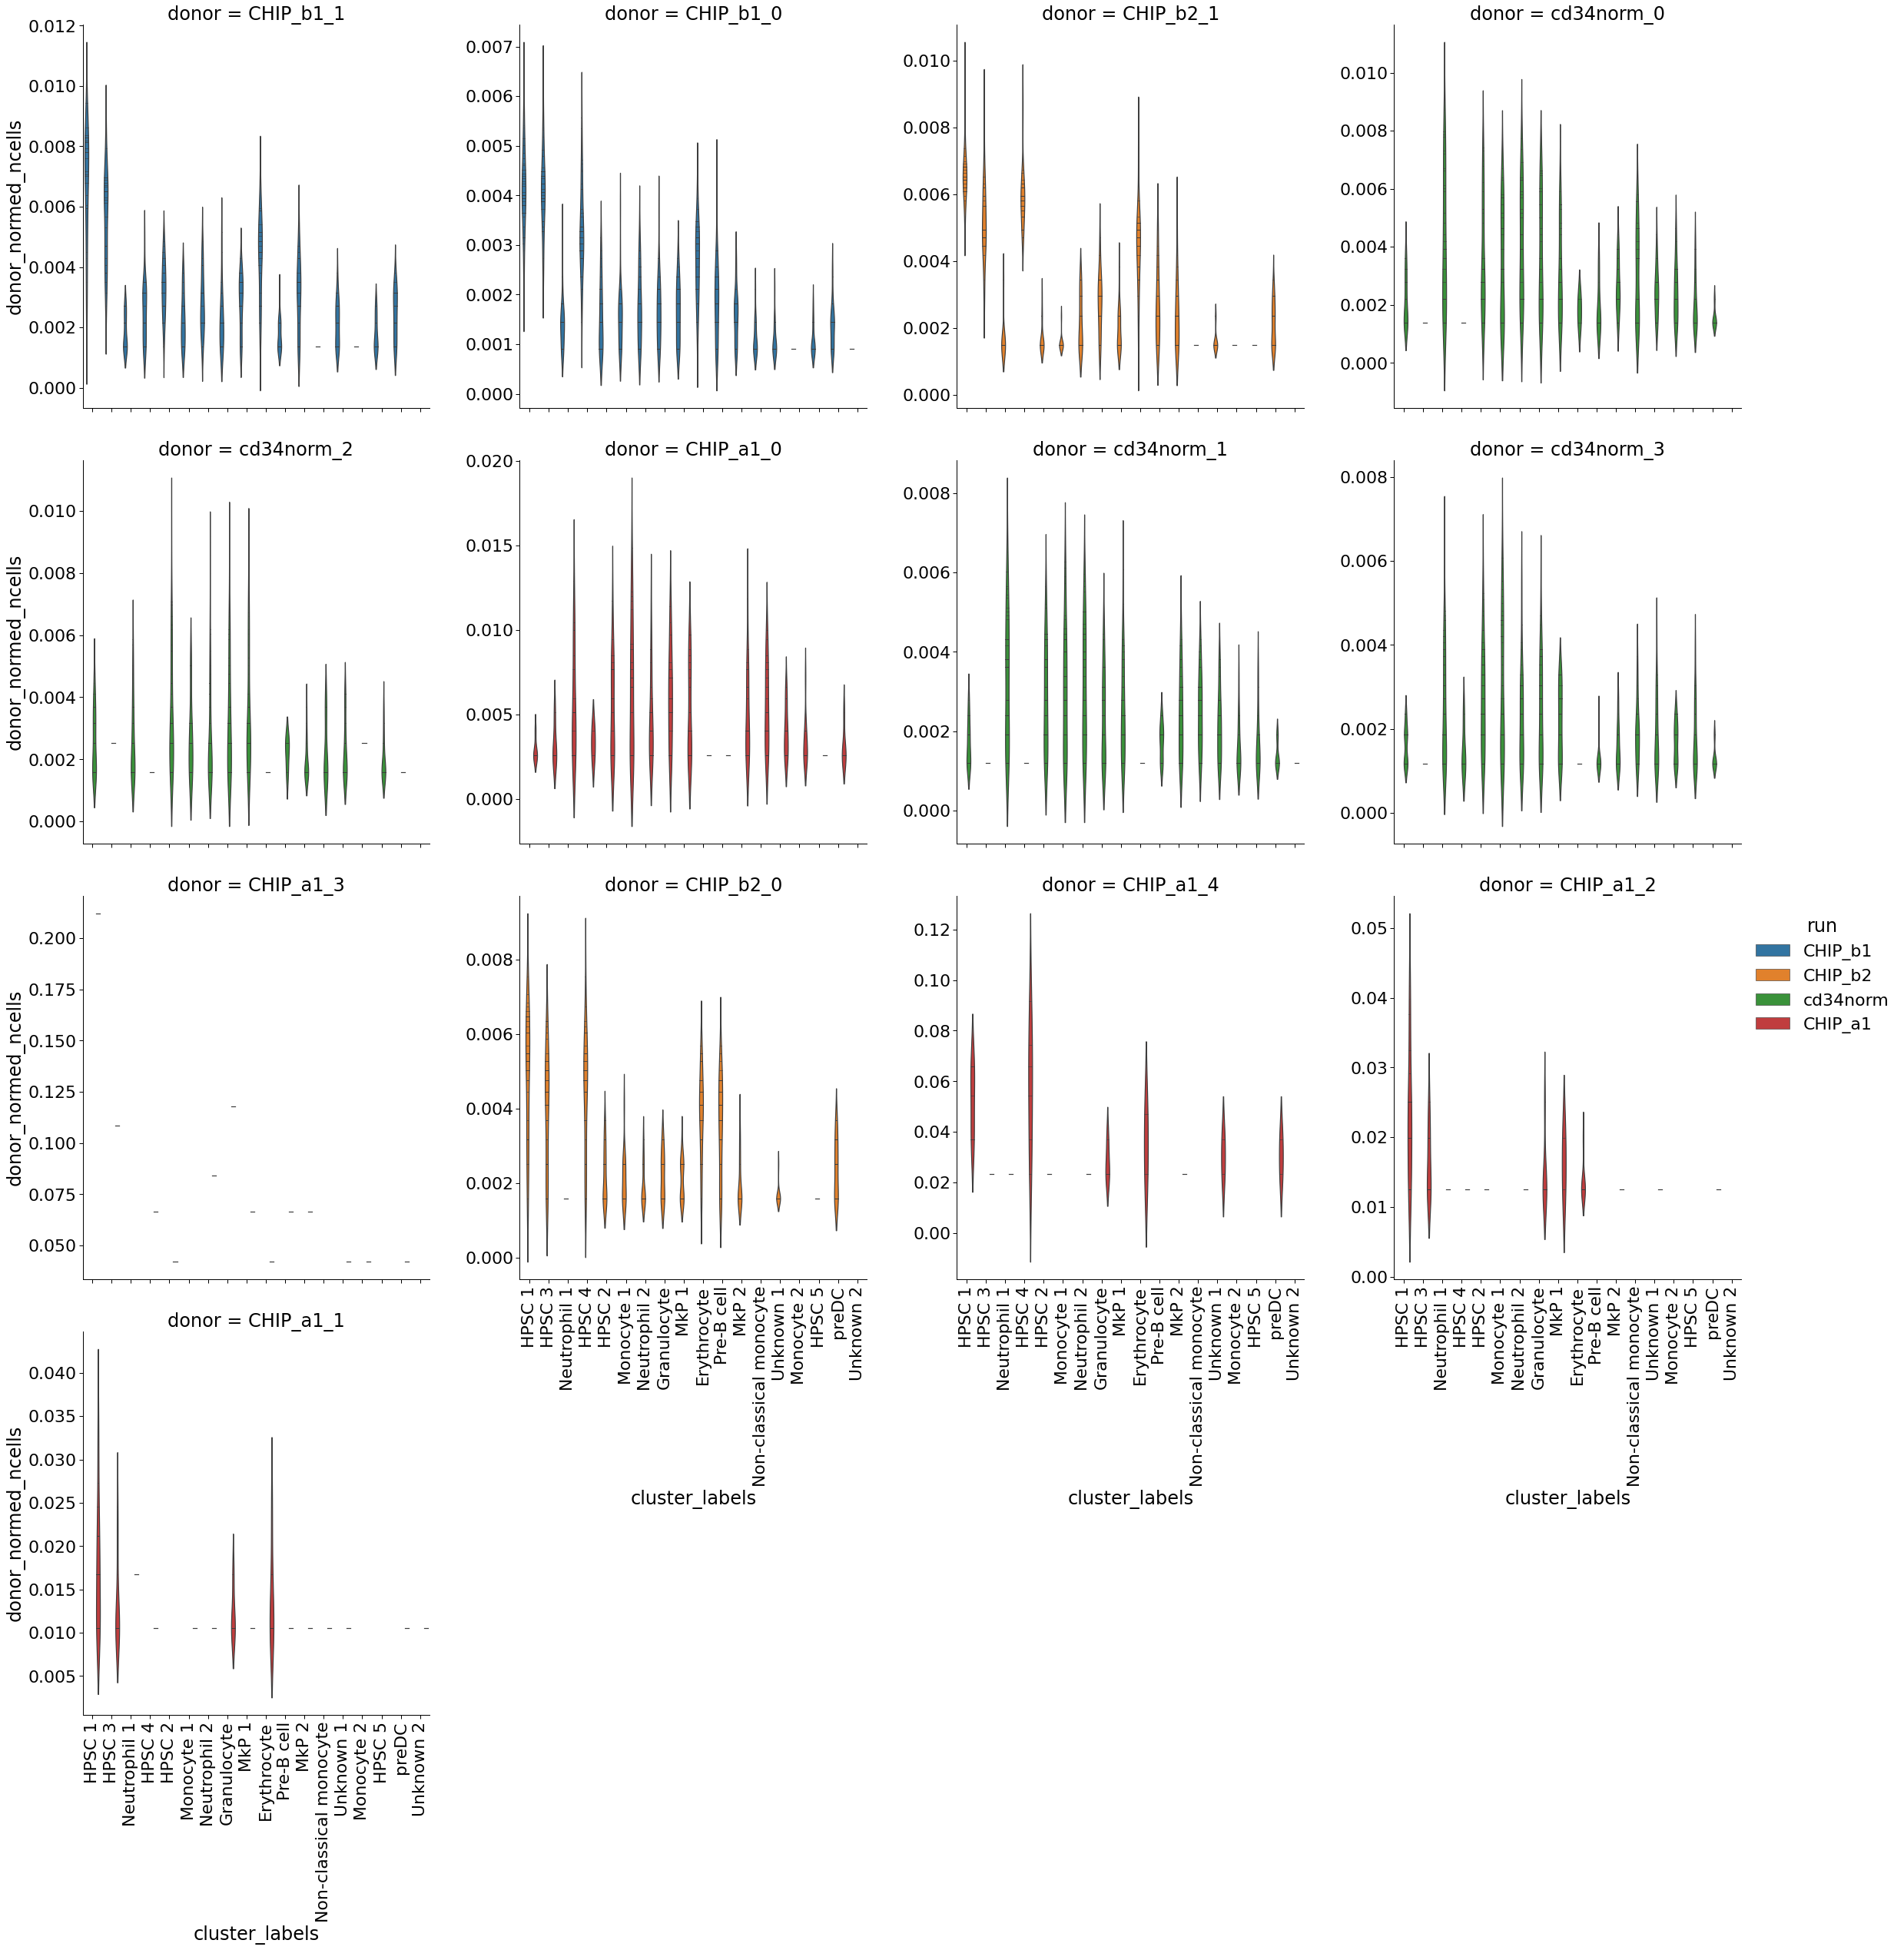

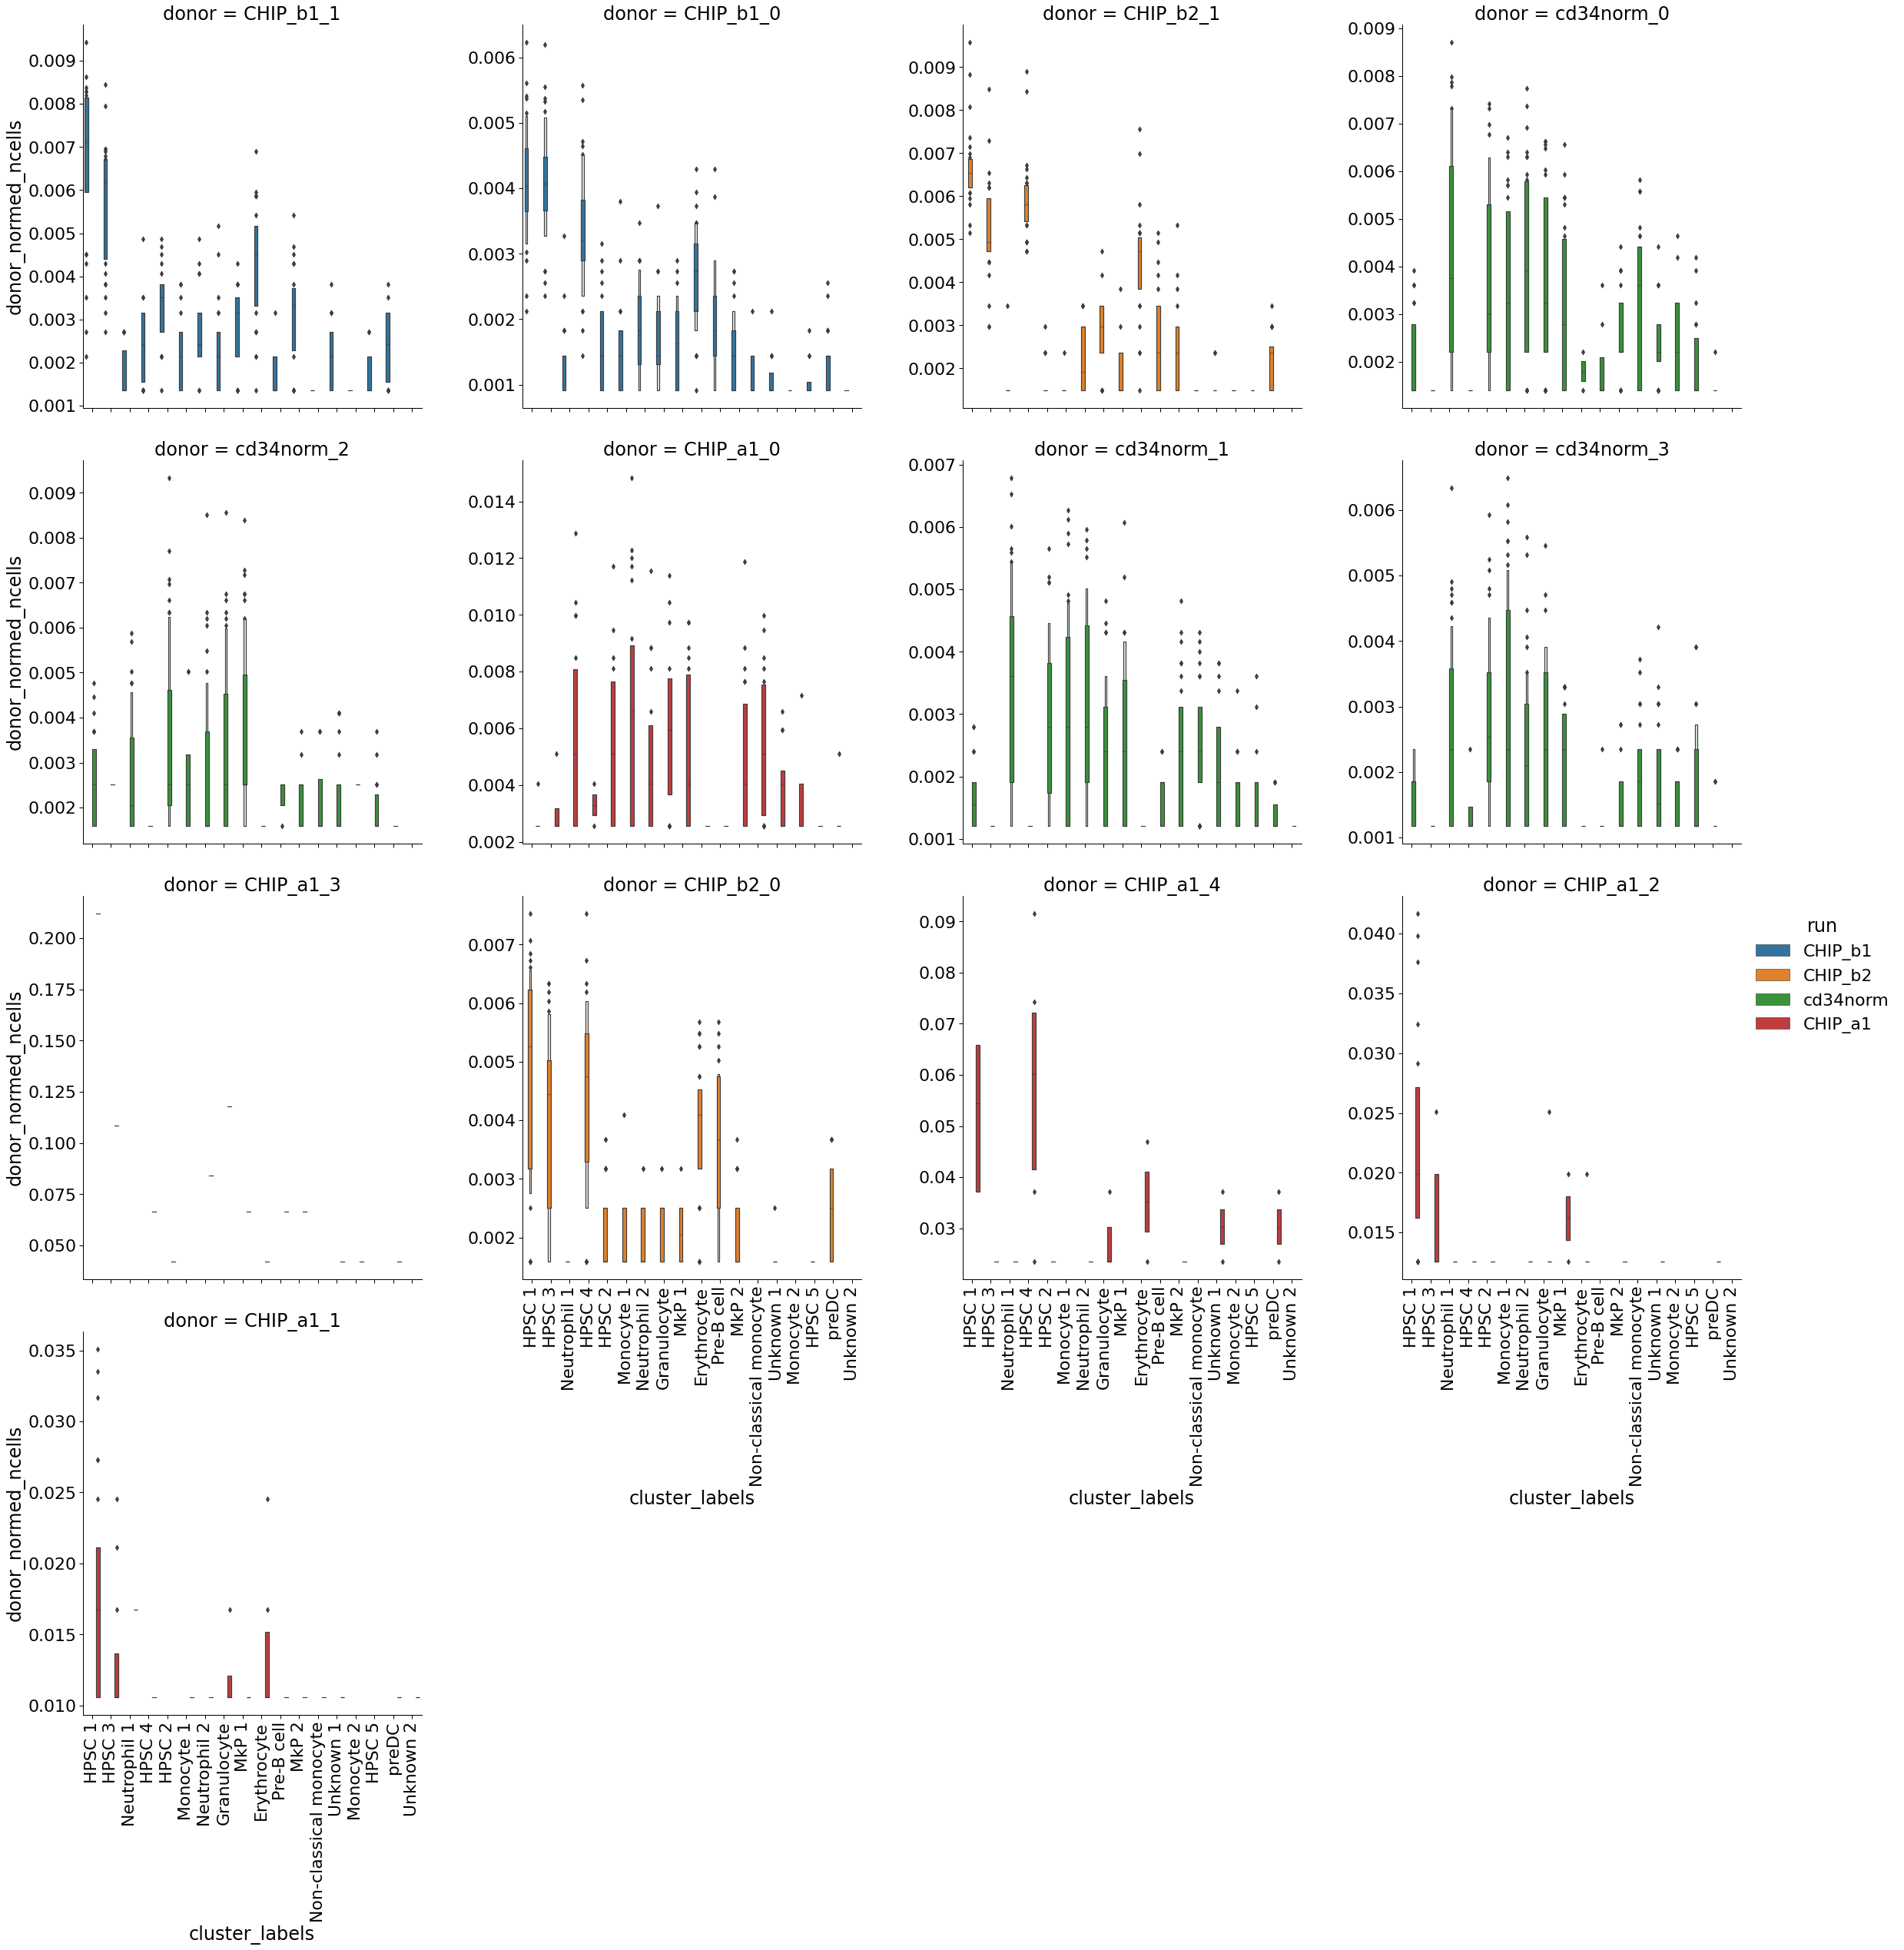

In [17]:
norm_outdir = join(outdir, "donor_normed_distributions")
if not os.path.exists(norm_outdir):
    os.mkdir(norm_outdir)
plots(clones_df, y_col="donor_normed_ncells", outdir=norm_outdir)

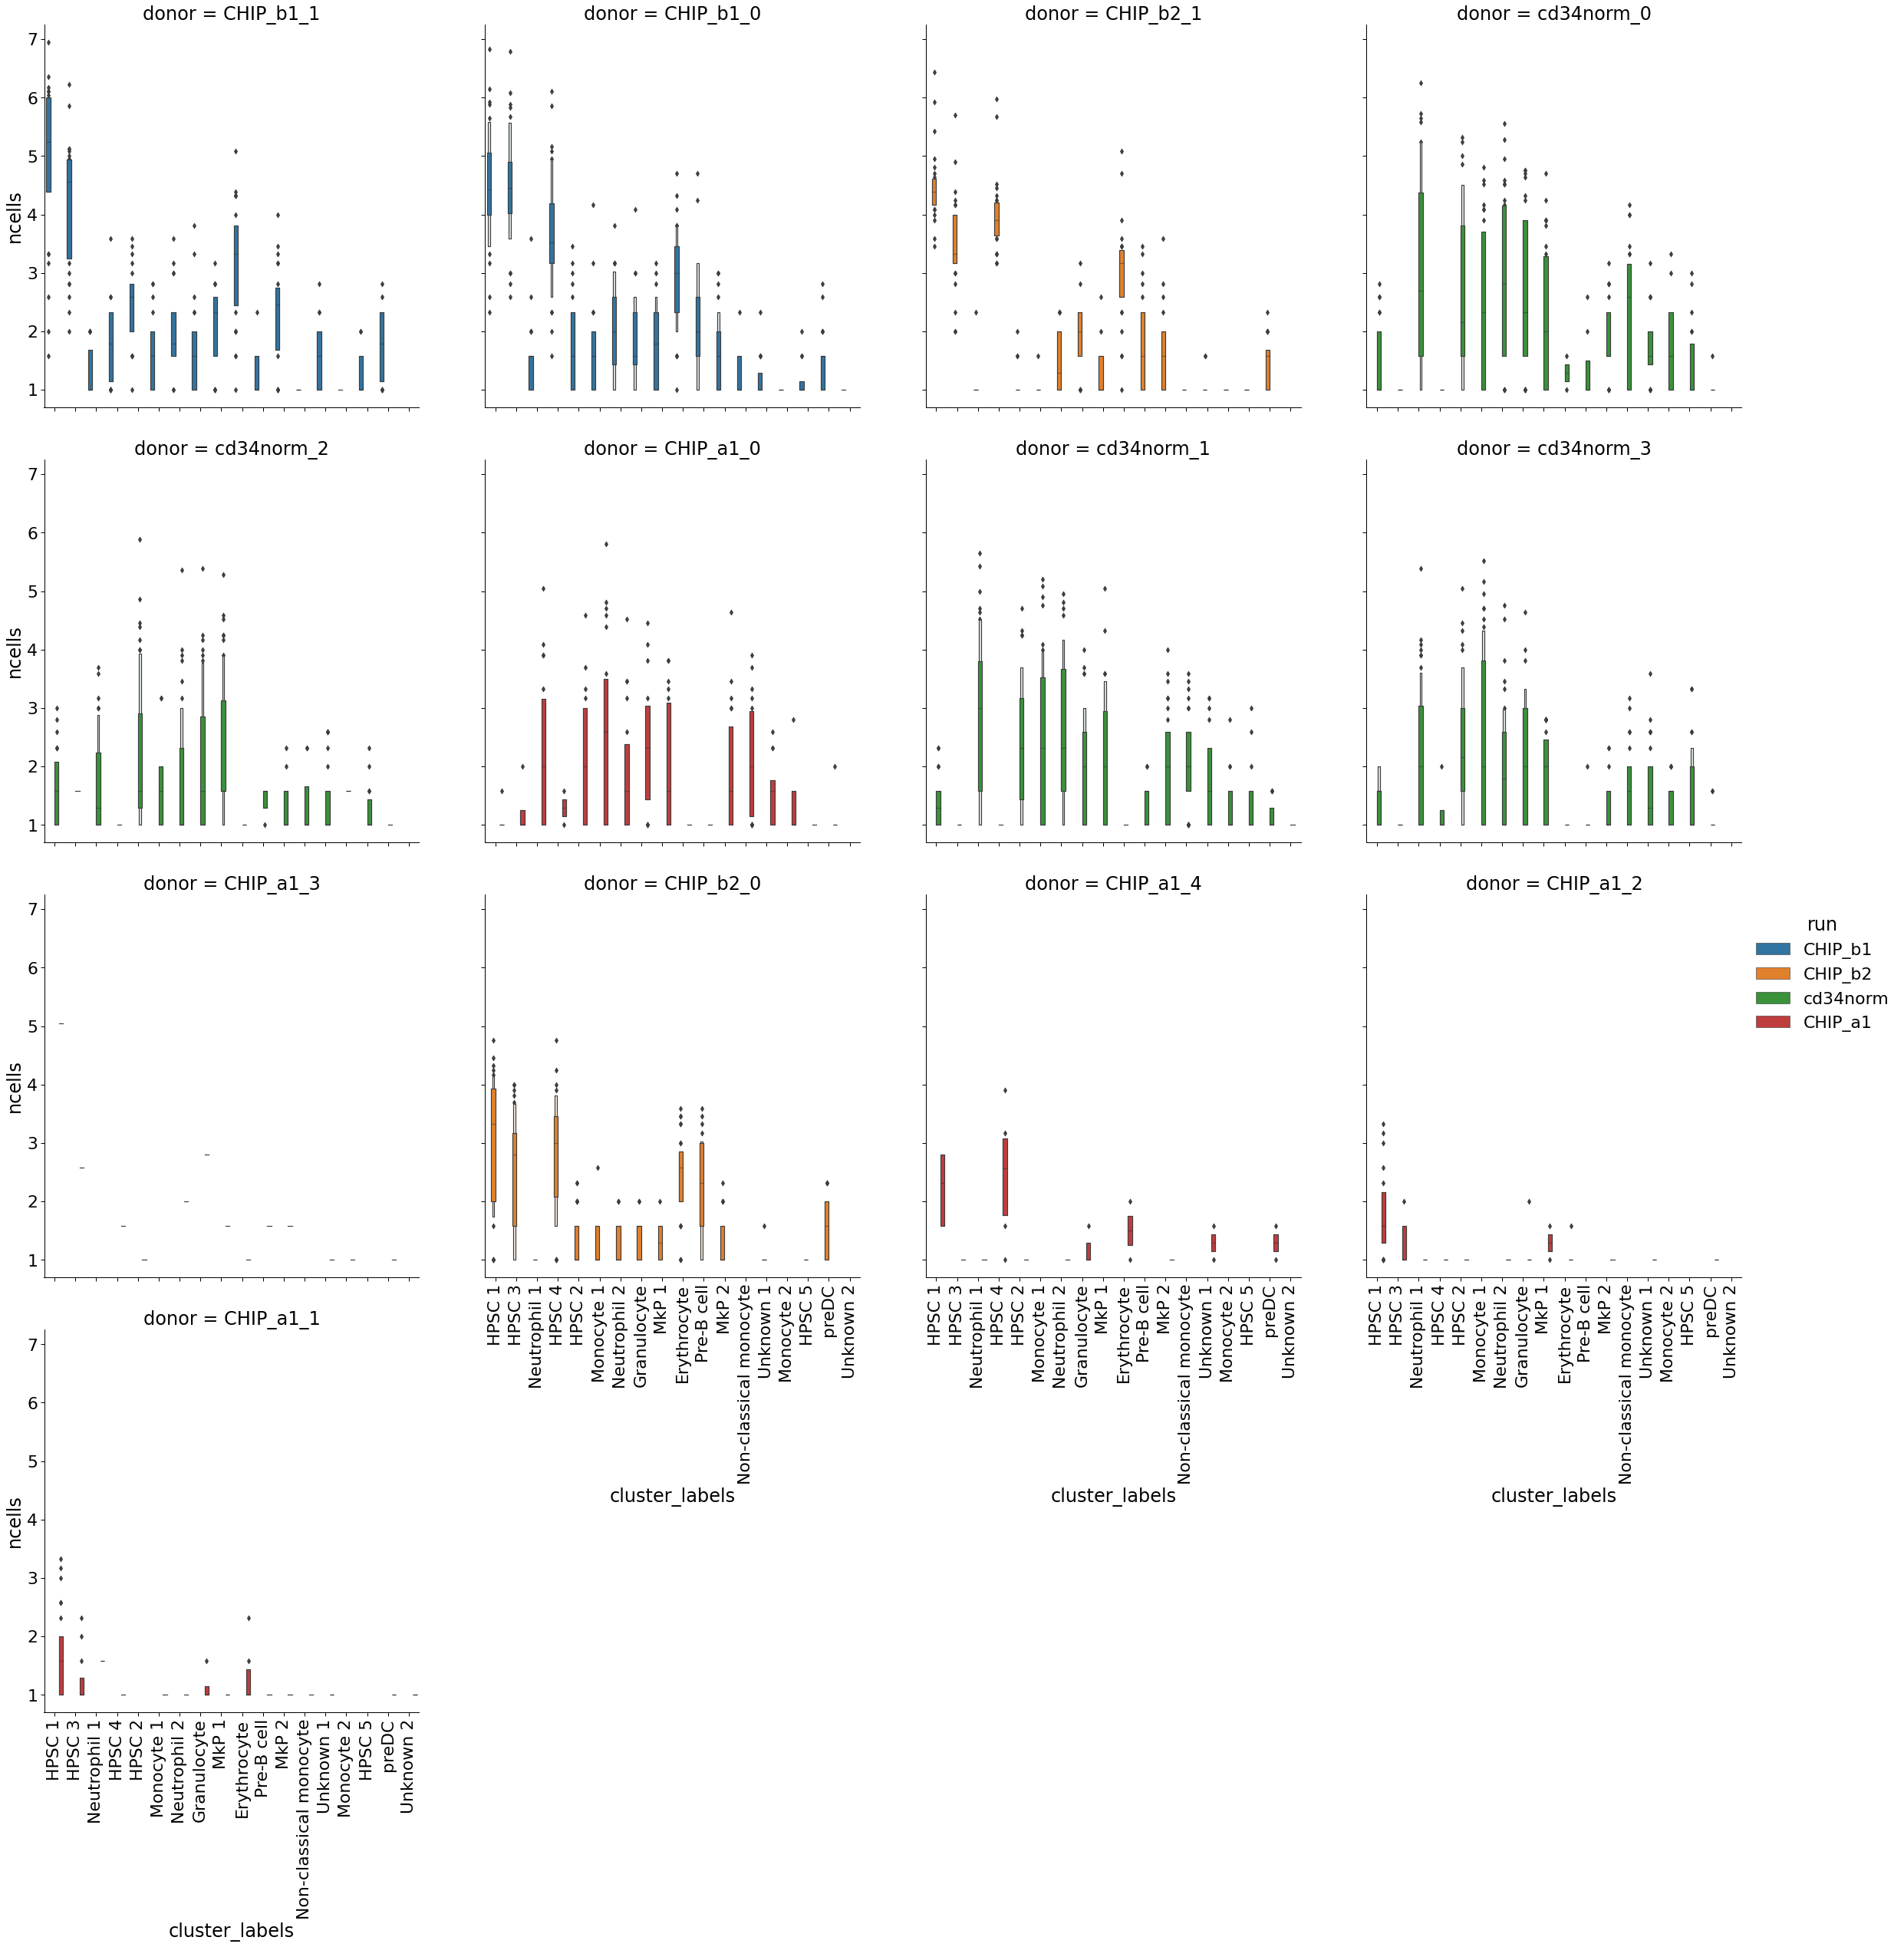

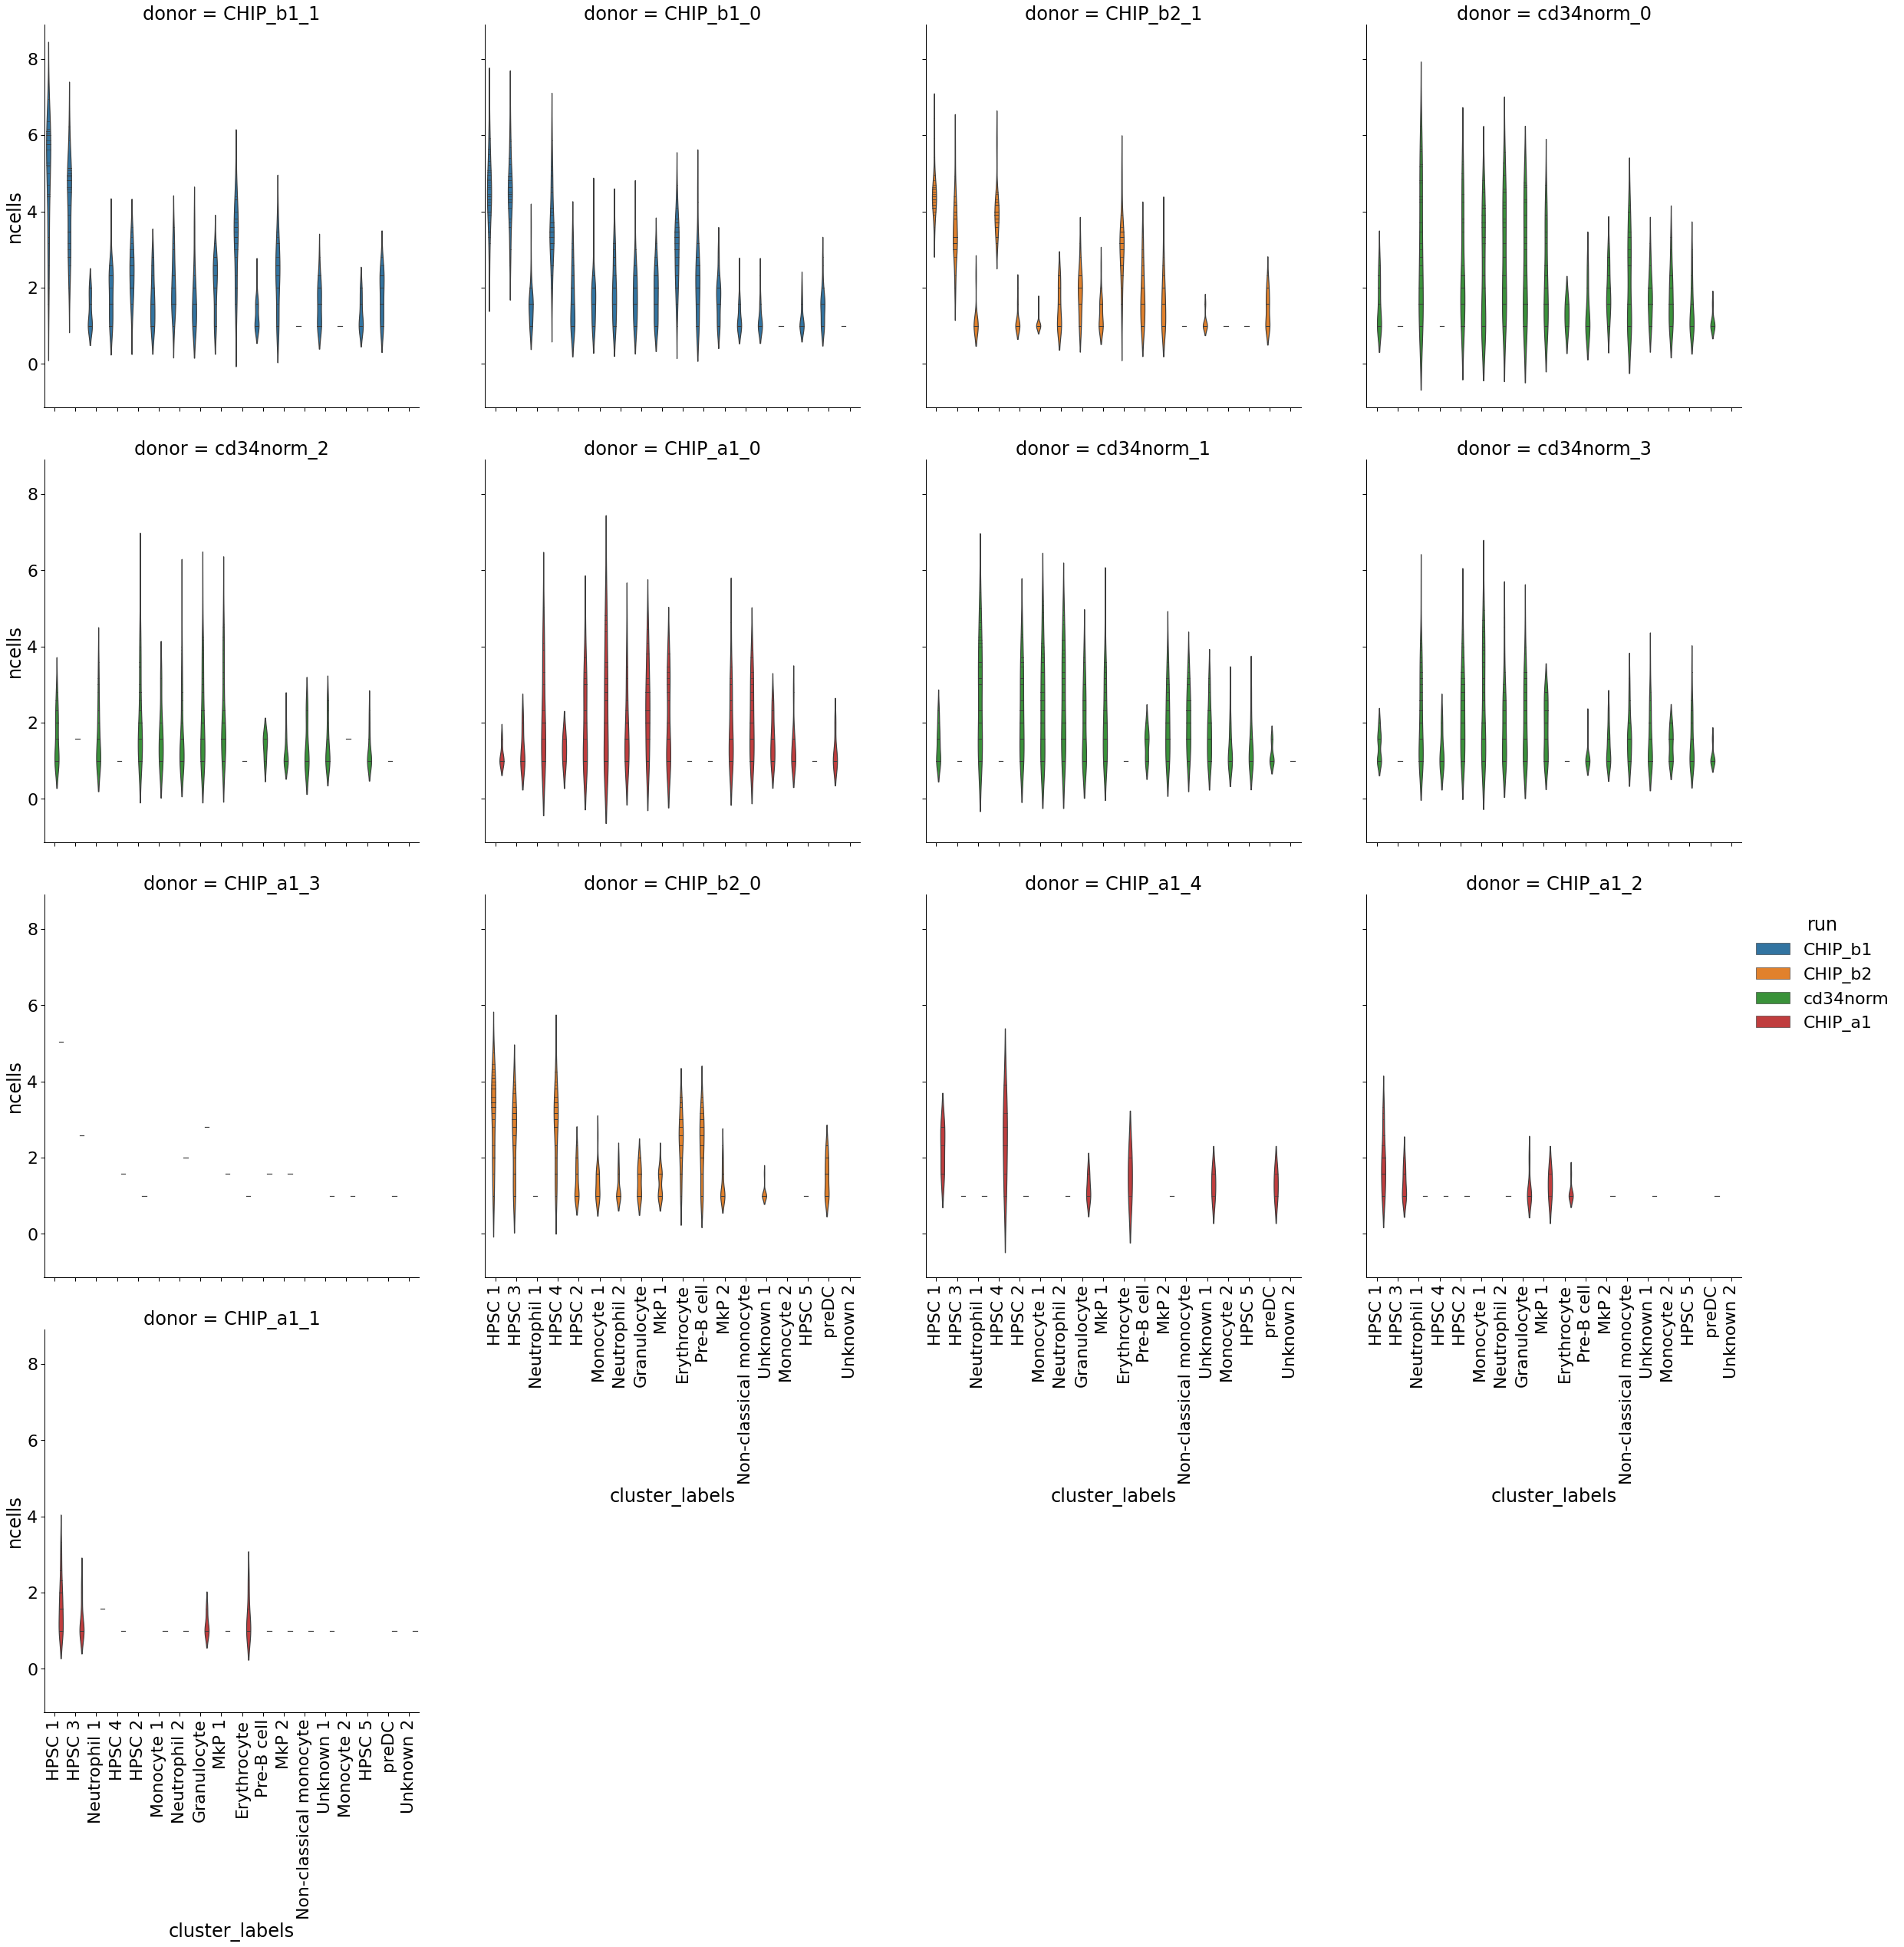

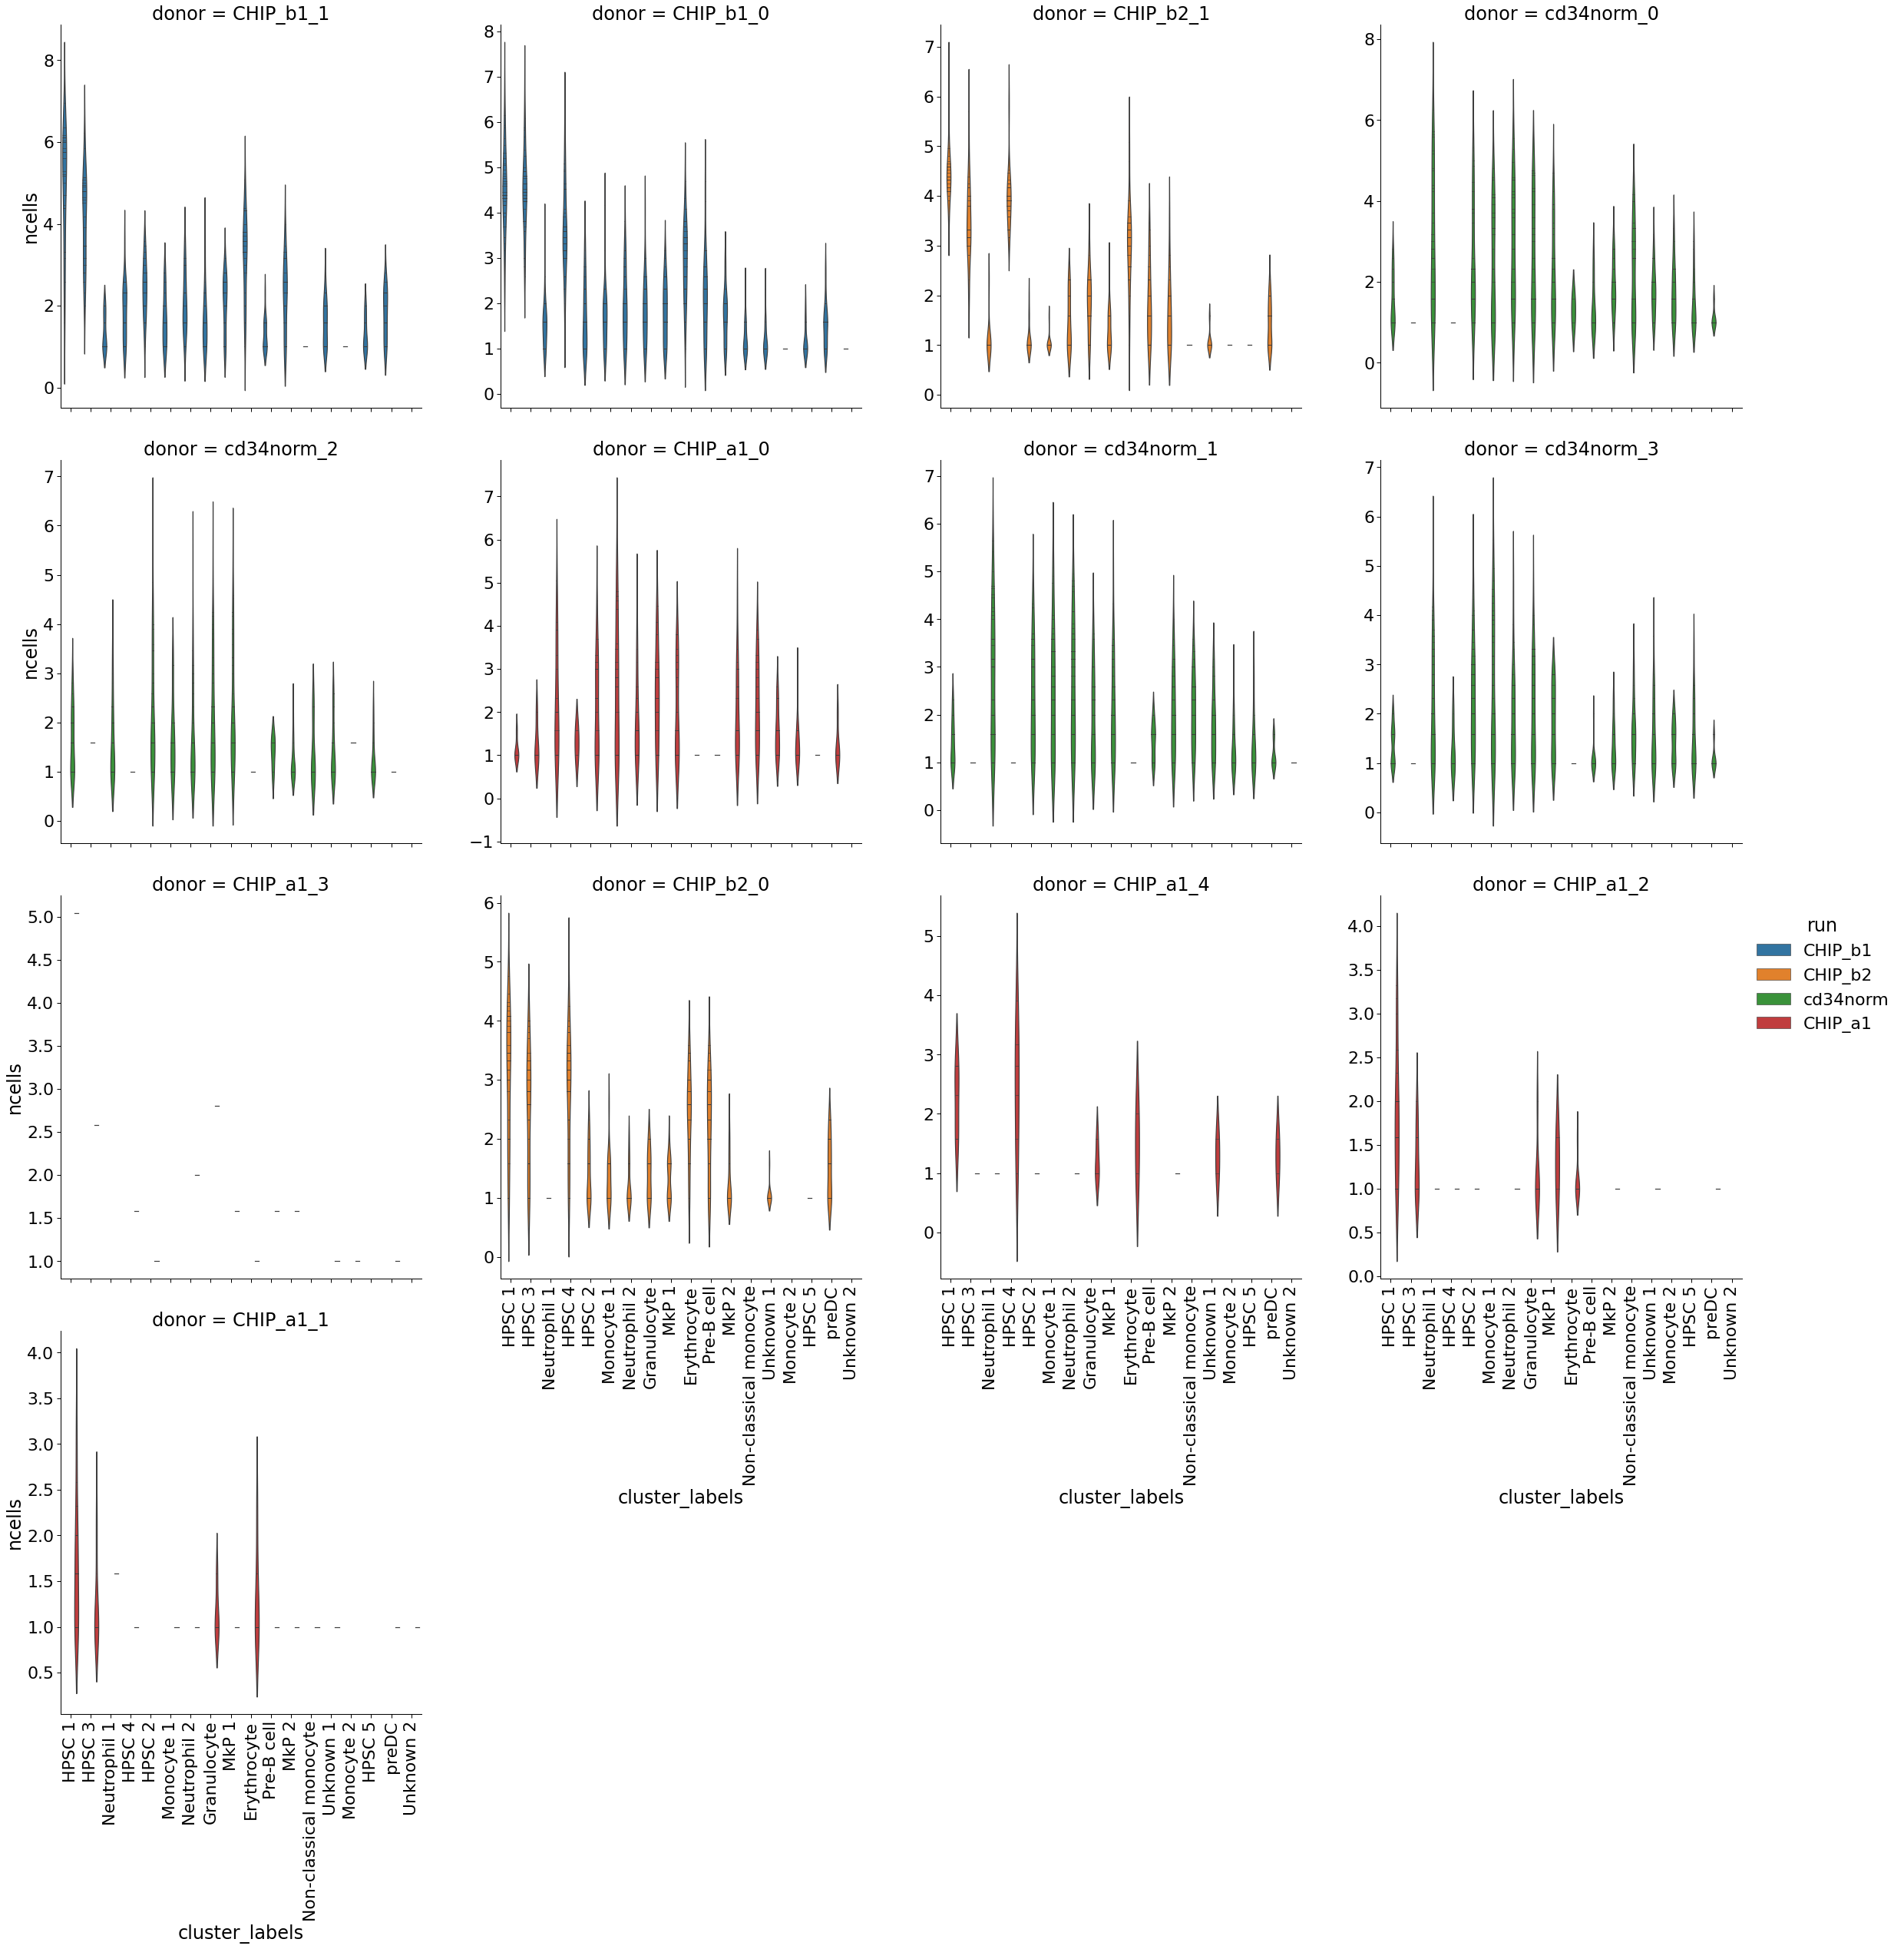

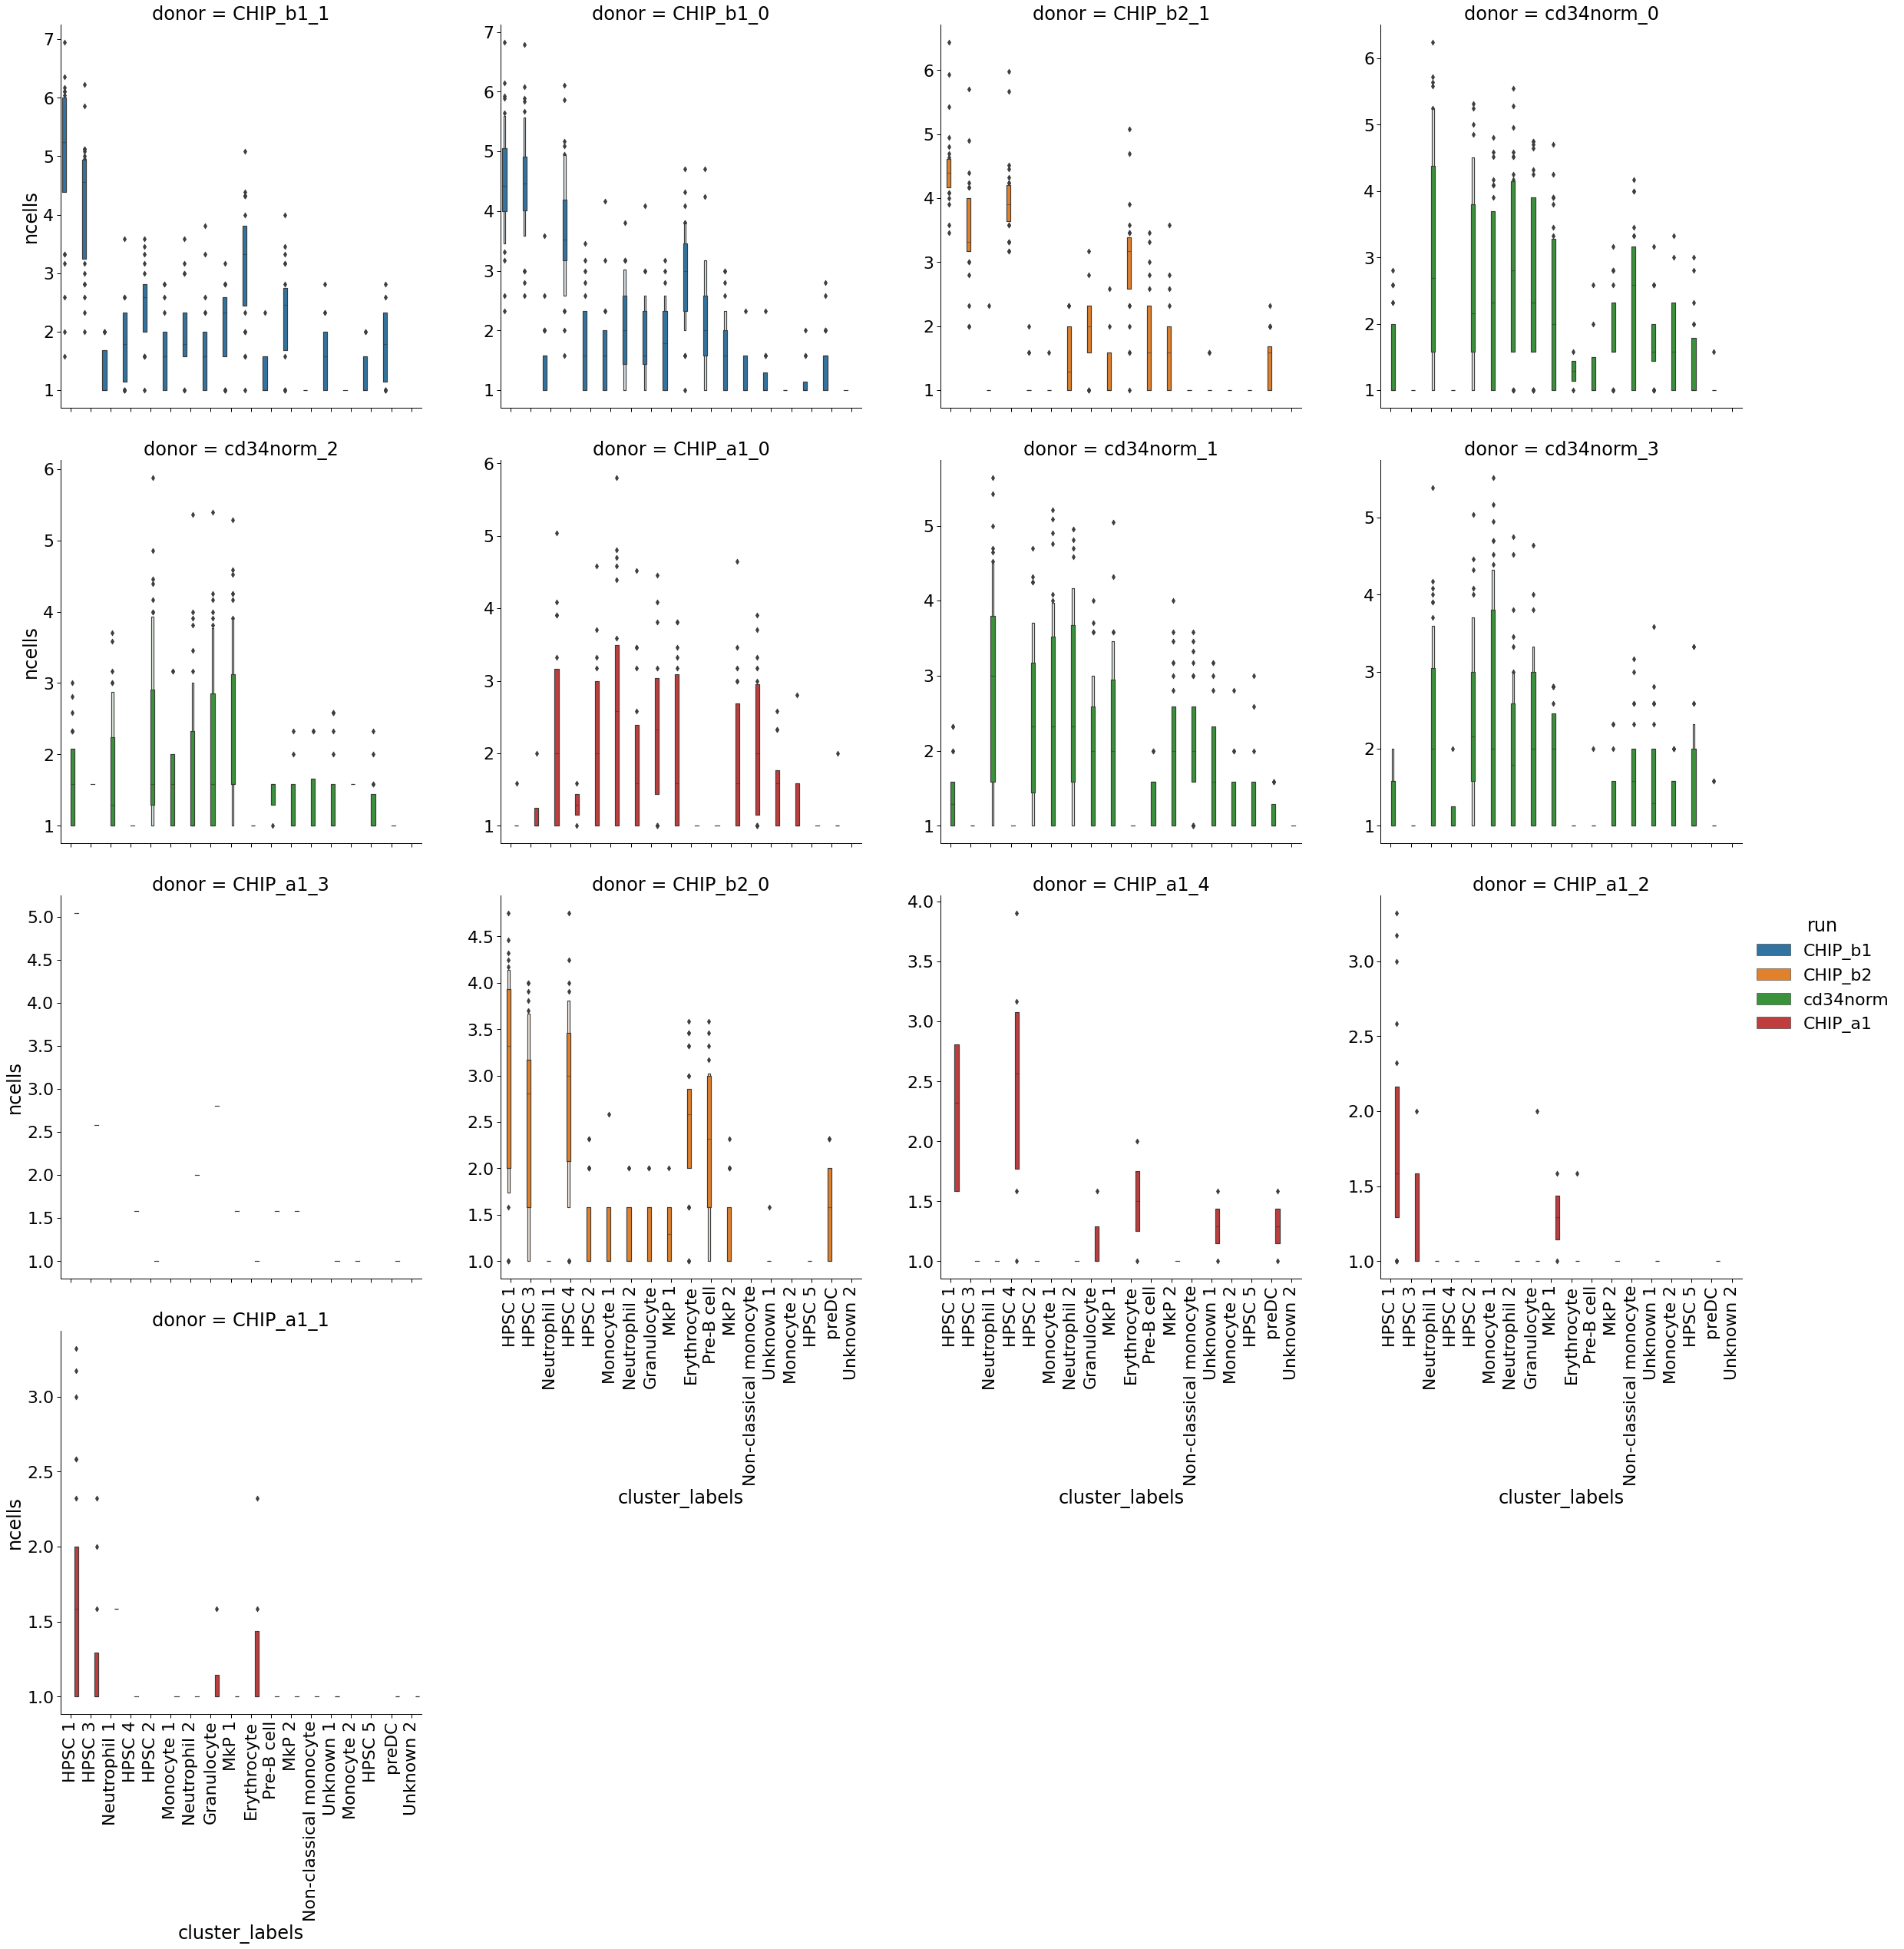

In [18]:
plots(clones_df, y_col="ncells", outdir=outdir)

In [19]:
# ## Run barplots for each donor separately for the top clones

# clones_df = cells_meta.groupby(["cluster_labels", "donor", "name", "run", "condition"]).size().reset_index().rename({0:"ncells"}, axis=1)
# clust_order = clones_df.groupby("cluster_labels").sum().sort_values("ncells")[::-1].index
# for don, val in clones_df.groupby("donor"):
#     top_vals = val.sort_values("ncells")[::-1][:top_n]
#     sns.catplot(x="cluster_labels", y="ncells", data=val, hue="condition", 
#                 sharex=True, sharey=False, 
#                 col="name", col_wrap=4, kind="bar", order=clust_order)
#     plt.savefig(join(outdir, "topClones_across_lineage.pdf"))
#     plt.savefig(join(outdir, "topClones_across_lineage.svg"))
#     plt.close()
    
#     sns.catplot(x="cluster_labels", y="ncells", data=val, hue="condition", 
#                 sharex=False, sharey=False, 
#                 col="name", col_wrap=4, kind="bar", order=clust_order)
#     plt.savefig(join(outdir, "topClones_across_lineage_diffOrder.pdf"))
#     plt.savefig(join(outdir, "topClones_across_lineage_diffOrder.svg"))
#     plt.close()

In [20]:
# sns.catplot(x="cluster_labels", y="ncells", data=clones_df, hue="run", 
#             row="donor", kind="boxen", )
# plt.savefig(join(outdir, "clone_cluster_boxen.svg"))
# plt.savefig(join(outdir, "clone_cluster_boxen.pdf"))

# sns.catplot(x="cluster_labels", y="ncells", data=clones_df, hue="run", 
#             row="donor", kind="box")
# plt.savefig(join(outdir, "clone_cluster_box.svg"))
# plt.savefig(join(outdir, "clone_cluster_box.pdf"))

# sns.catplot(x="cluster_labels", y="ncells", data=clones_df, hue="run", 
#             row="donor", kind="box", sharey=False)
# plt.savefig(join(outdir, "clone_cluster_box_noShareY.svg"))
# plt.savefig(join(outdir, "clone_cluster_box.noShareY.pdf"))

# clones_df = cells_meta.groupby(["cluster_labels", "donor", "name", "run", "condition"]).size().reset_index().rename({0:"ncells"}, axis=1)
# clust_order = clones_df.groupby("cluster_labels").sum().sort_values("ncells")[::-1].index
# for don, val in clones_df.groupby("donor"):
#     top_vals = val.sort_values("ncells")[::-1][:top_n]
#     sns.catplot(x="cluster_labels", y="ncells", data=val, hue="condition", 
#                 sharex=True, sharey=False, 
#                 col="name", col_wrap=4, kind="bar", order=clust_order)
#     plt.savefig(join(outdir, "topClones_across_lineage.pdf"))
#     plt.savefig(join(outdir, "topClones_across_lineage.svg"))
#     plt.close()
    
#     sns.catplot(x="cluster_labels", y="ncells", data=val, hue="condition", 
#                 sharex=False, sharey=False, 
#                 col="name", col_wrap=4, kind="bar", order=clust_order)
#     plt.savefig(join(outdir, "topClones_across_lineage_diffOrder.pdf"))
#     plt.savefig(join(outdir, "topClones_across_lineage_diffOrder.svg"))
#     plt.close()

In [21]:
outdir

'/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var_init/variants.prefilterMerge_impute_knnRes.30/aggregate/annotation/clone_lineage/'